---
Title: "CITS 5508-Assignment2"
Author: "Ronjon Kundu (23215183)"
Date: "4/5/2023"

---

# Breast cancer wisconsin (diagnostic) dataset

The load_breast_cancer function in Scikit-learn is used to load the breast cancer dataset, which contains information on breast cancer tumors, such as their size, texture, and malignancy.

Number of Instances: 569
Number of Attributes: 30 numeric, predictive attributes and the class
Attribute Information:
radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness (local variation in radius lengths)
compactness (perimeter^2 / area - 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symmetry
fractal dimension ("coastline approximation" - 1)
The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.
The target variable is binary, indicating whether the tumor is malignant (encoded as 0) or benign (encoded as 1).
This dataset is commonly used for classification tasks and is a good example of a binary classification problem.

In [1]:
import os
import tarfile
import pandas as pd

from six.moves import urllib
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
X = data.data
y = data.target
X.shape

(569, 30)

In [3]:
df_breast_cancer = pd.DataFrame(data=X, columns=data.feature_names)
df_breast_cancer['target'] = pd.Series(data.target)
df_breast_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

#### 2 Investigate whether some features can be dropped through some suitable visualisation of the data. Determine from  visualisation what features can be dropped and Python code to drop them from feature matrix X. Split X and y into a training set and a test set using the split ratio 85/15 and random state=123.

In [4]:
corr_matrix = df_breast_cancer.corr()
print(corr_matrix)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

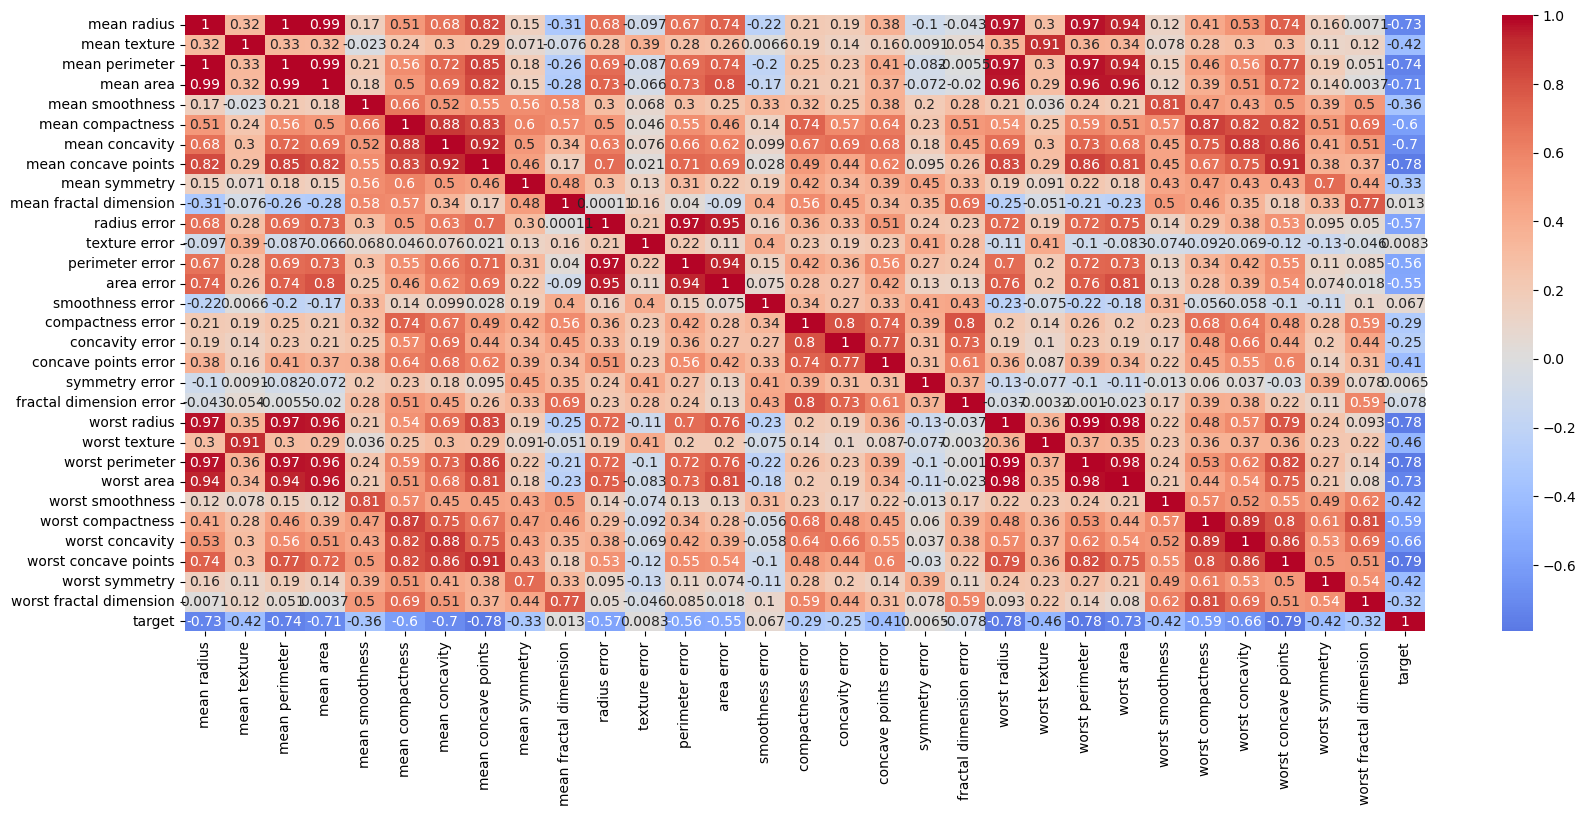

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

C:\cits5508-2023\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


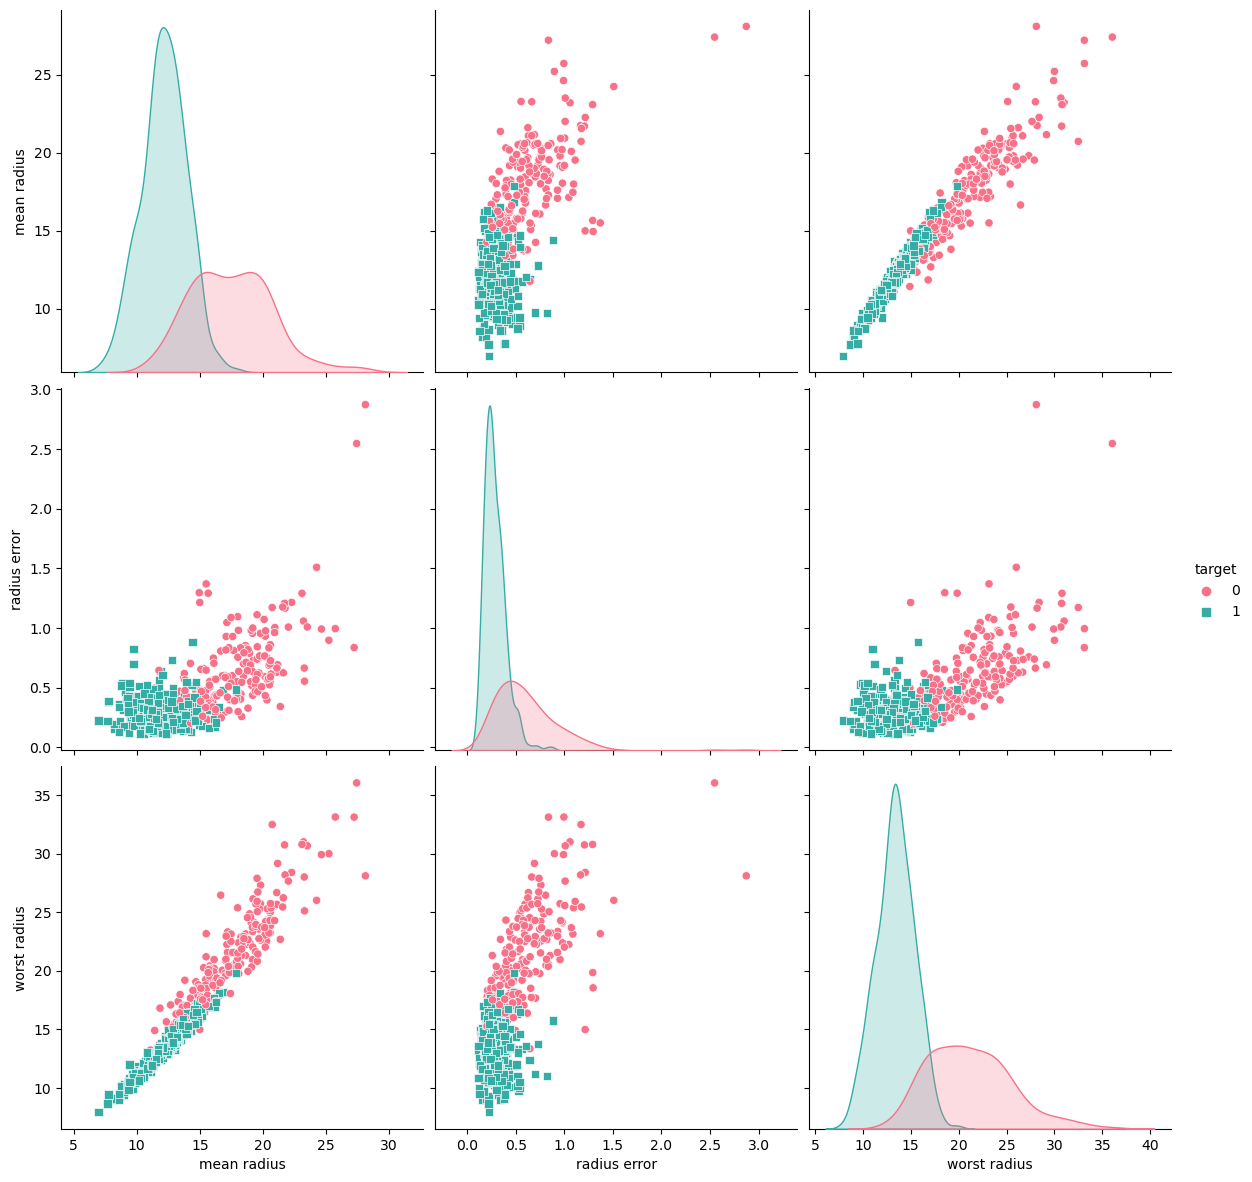

In [6]:
radius = df_breast_cancer[['mean radius','radius error','worst radius','target']]
sns.pairplot(radius, hue='target',palette="husl", markers=["o", "s"],size=4)

C:\cits5508-2023\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


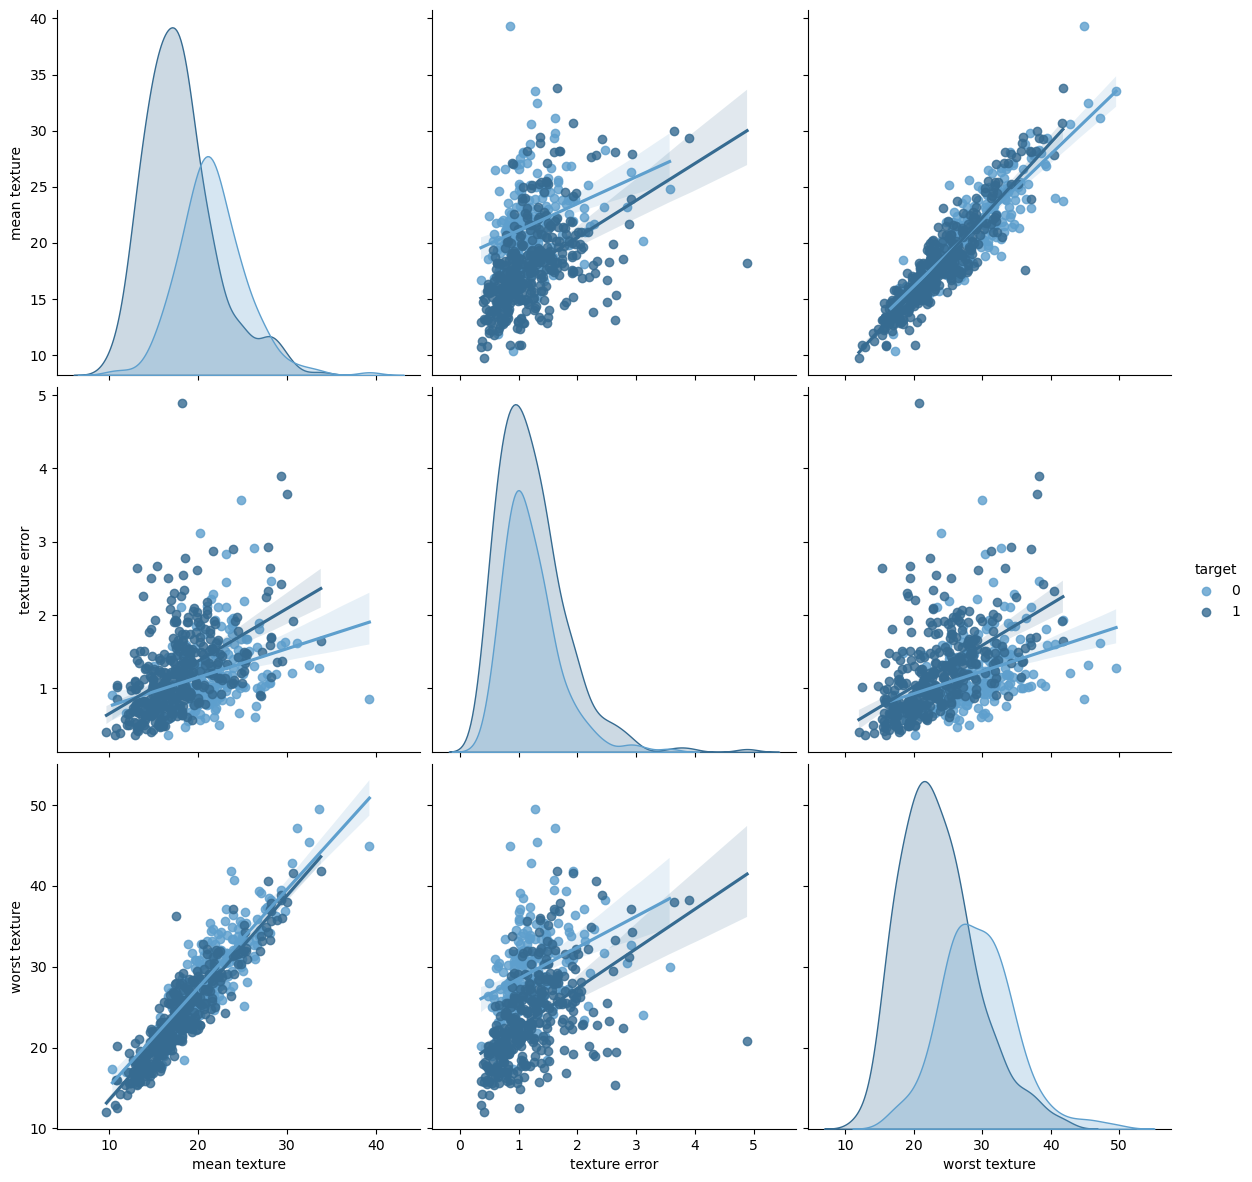

In [7]:
texture = df_breast_cancer[['mean texture','texture error','worst texture','target']]
sns.pairplot(texture, hue='target', palette="Blues_d",size=4, kind="reg")

C:\cits5508-2023\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


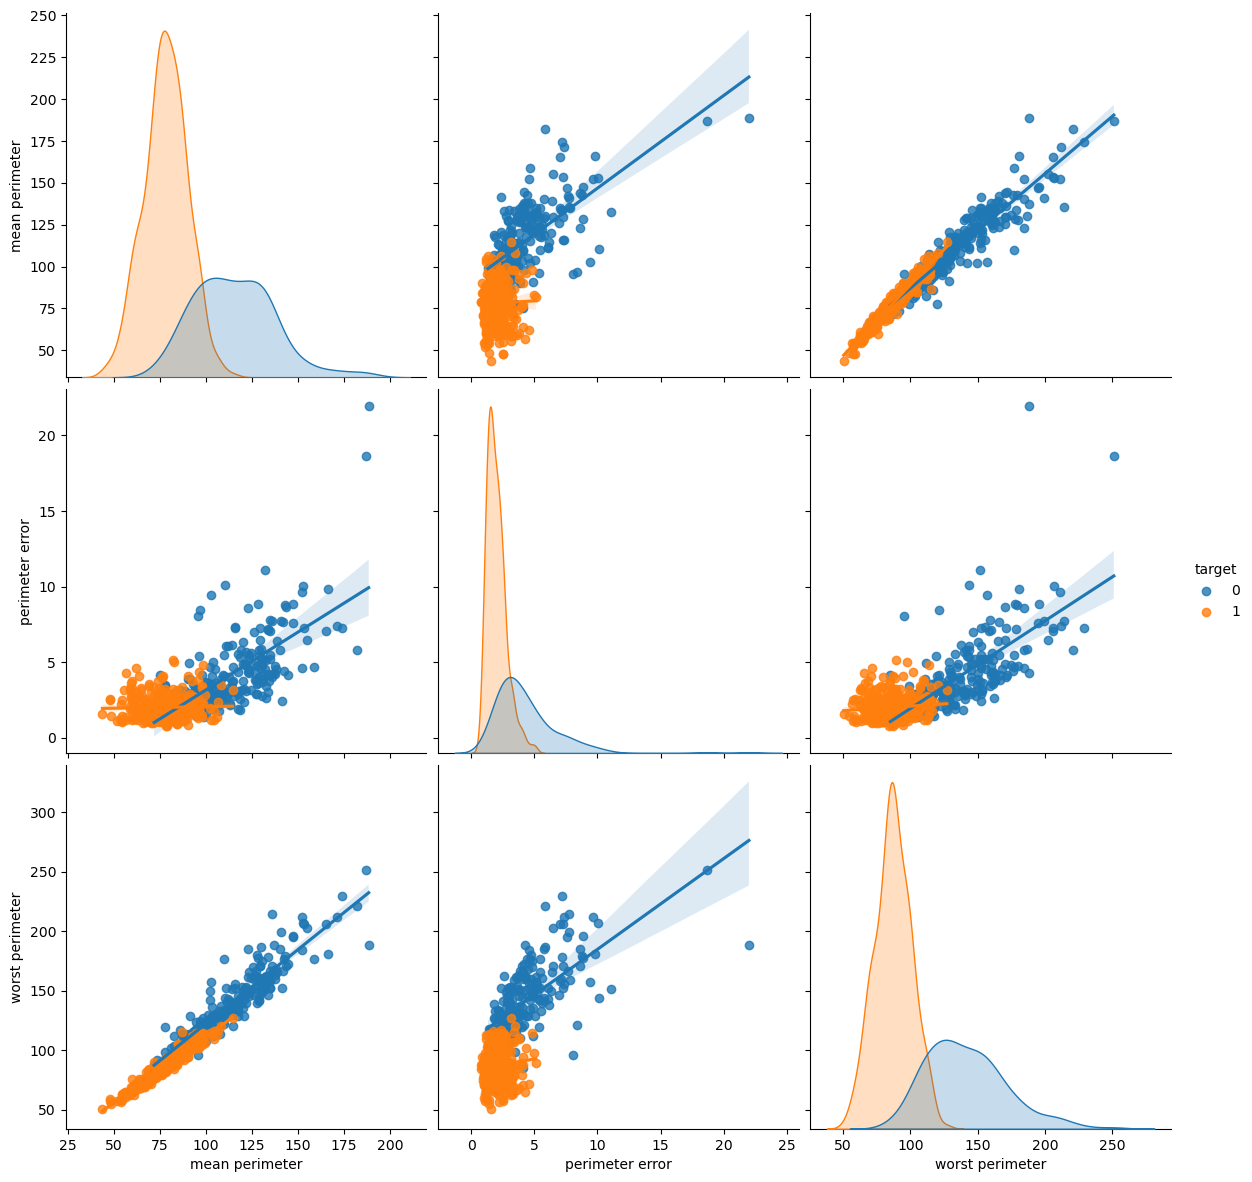

In [8]:
perimeter = df_breast_cancer[['mean perimeter','perimeter error','worst perimeter','target']]
sns.pairplot(perimeter, hue='target', size = 4, kind="reg")

C:\cits5508-2023\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


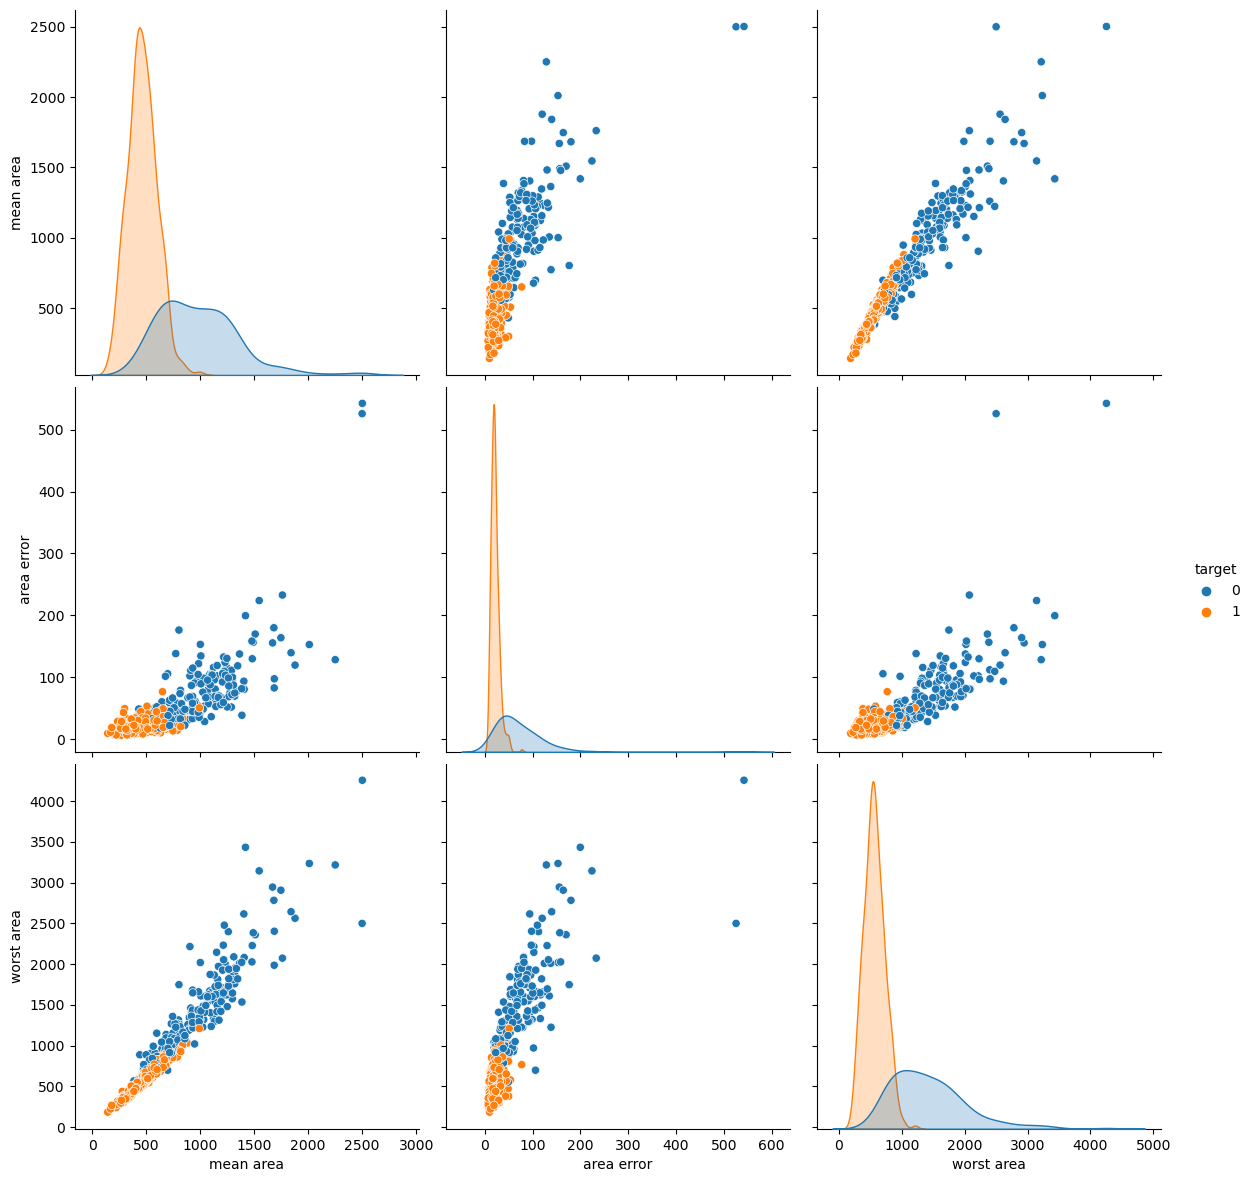

In [9]:
area = df_breast_cancer[['mean area','area error','worst area','target']]
sns.pairplot(area, hue='target', size =4)

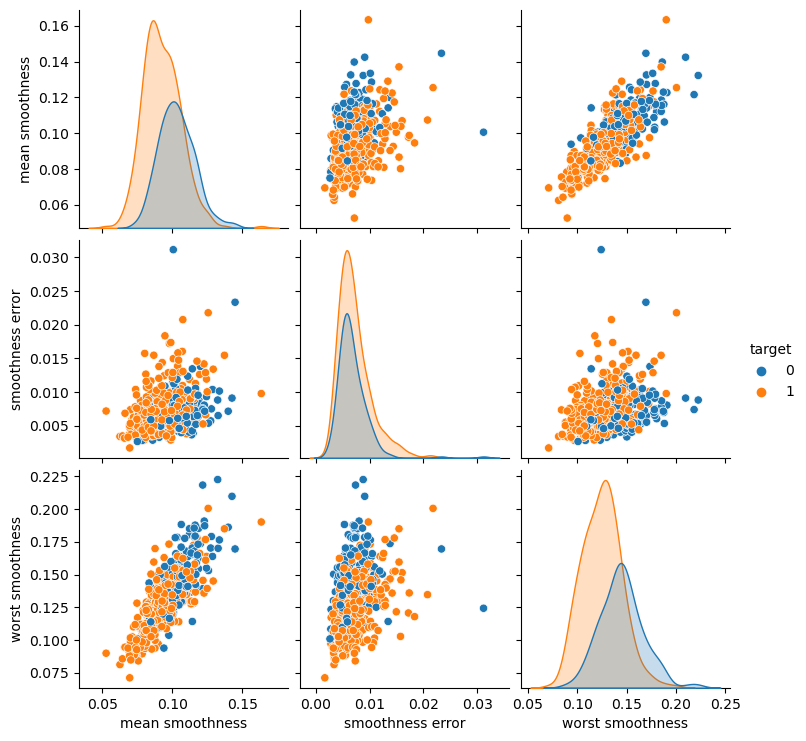

In [10]:
smoothness = df_breast_cancer[['mean smoothness','smoothness error','worst smoothness','target']]
sns.pairplot(smoothness, hue='target')

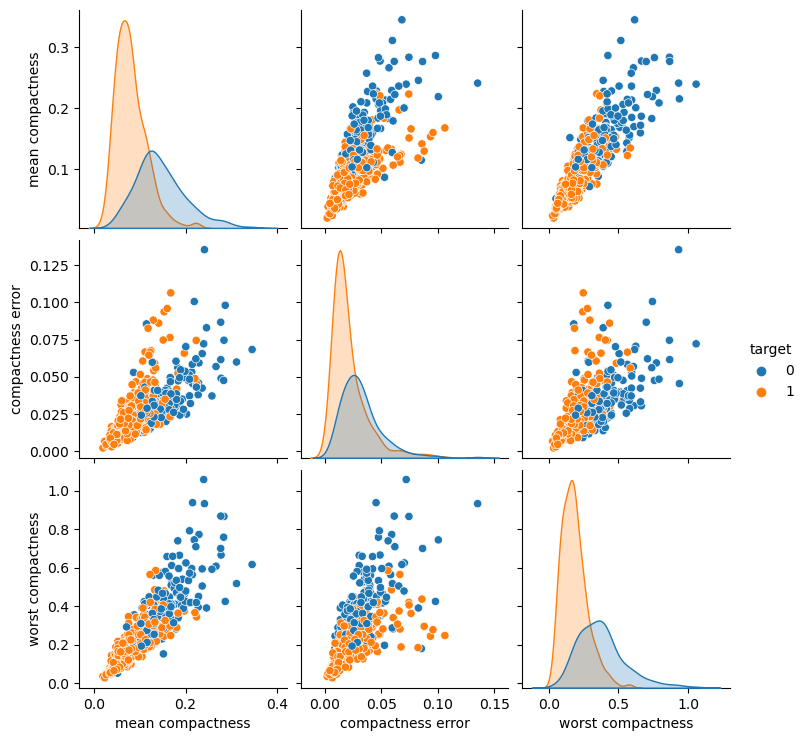

In [11]:
compactness = df_breast_cancer[['mean compactness','compactness error','worst compactness','target']]
sns.pairplot(compactness, hue='target')

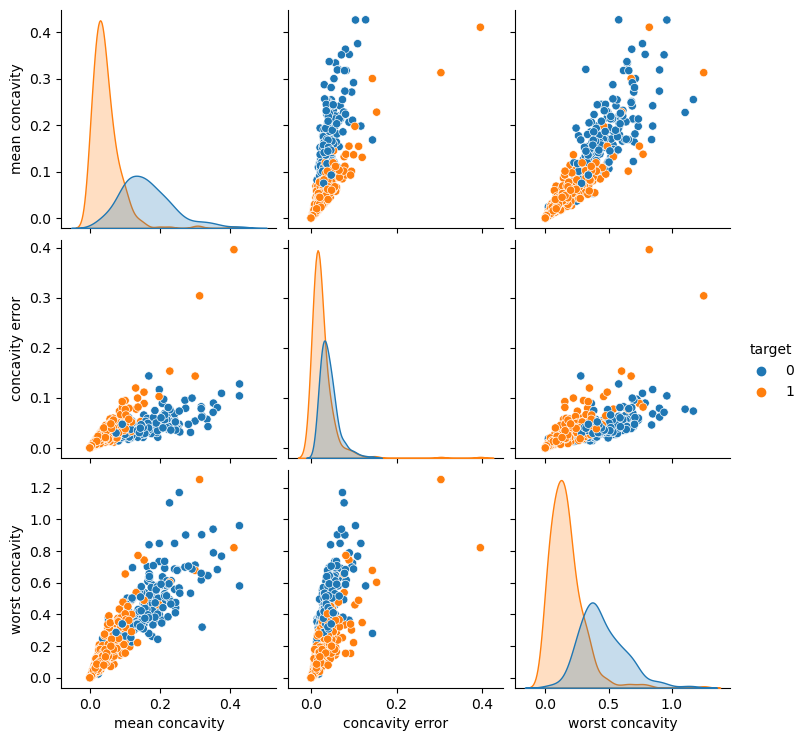

In [12]:
concavity = df_breast_cancer[['mean concavity','concavity error','worst concavity','target']]
sns.pairplot(concavity, hue='target')

C:\Users\HP\AppData\Local\Temp\ipykernel_7680\292002686.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_breast_cancer[df_breast_cancer.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])


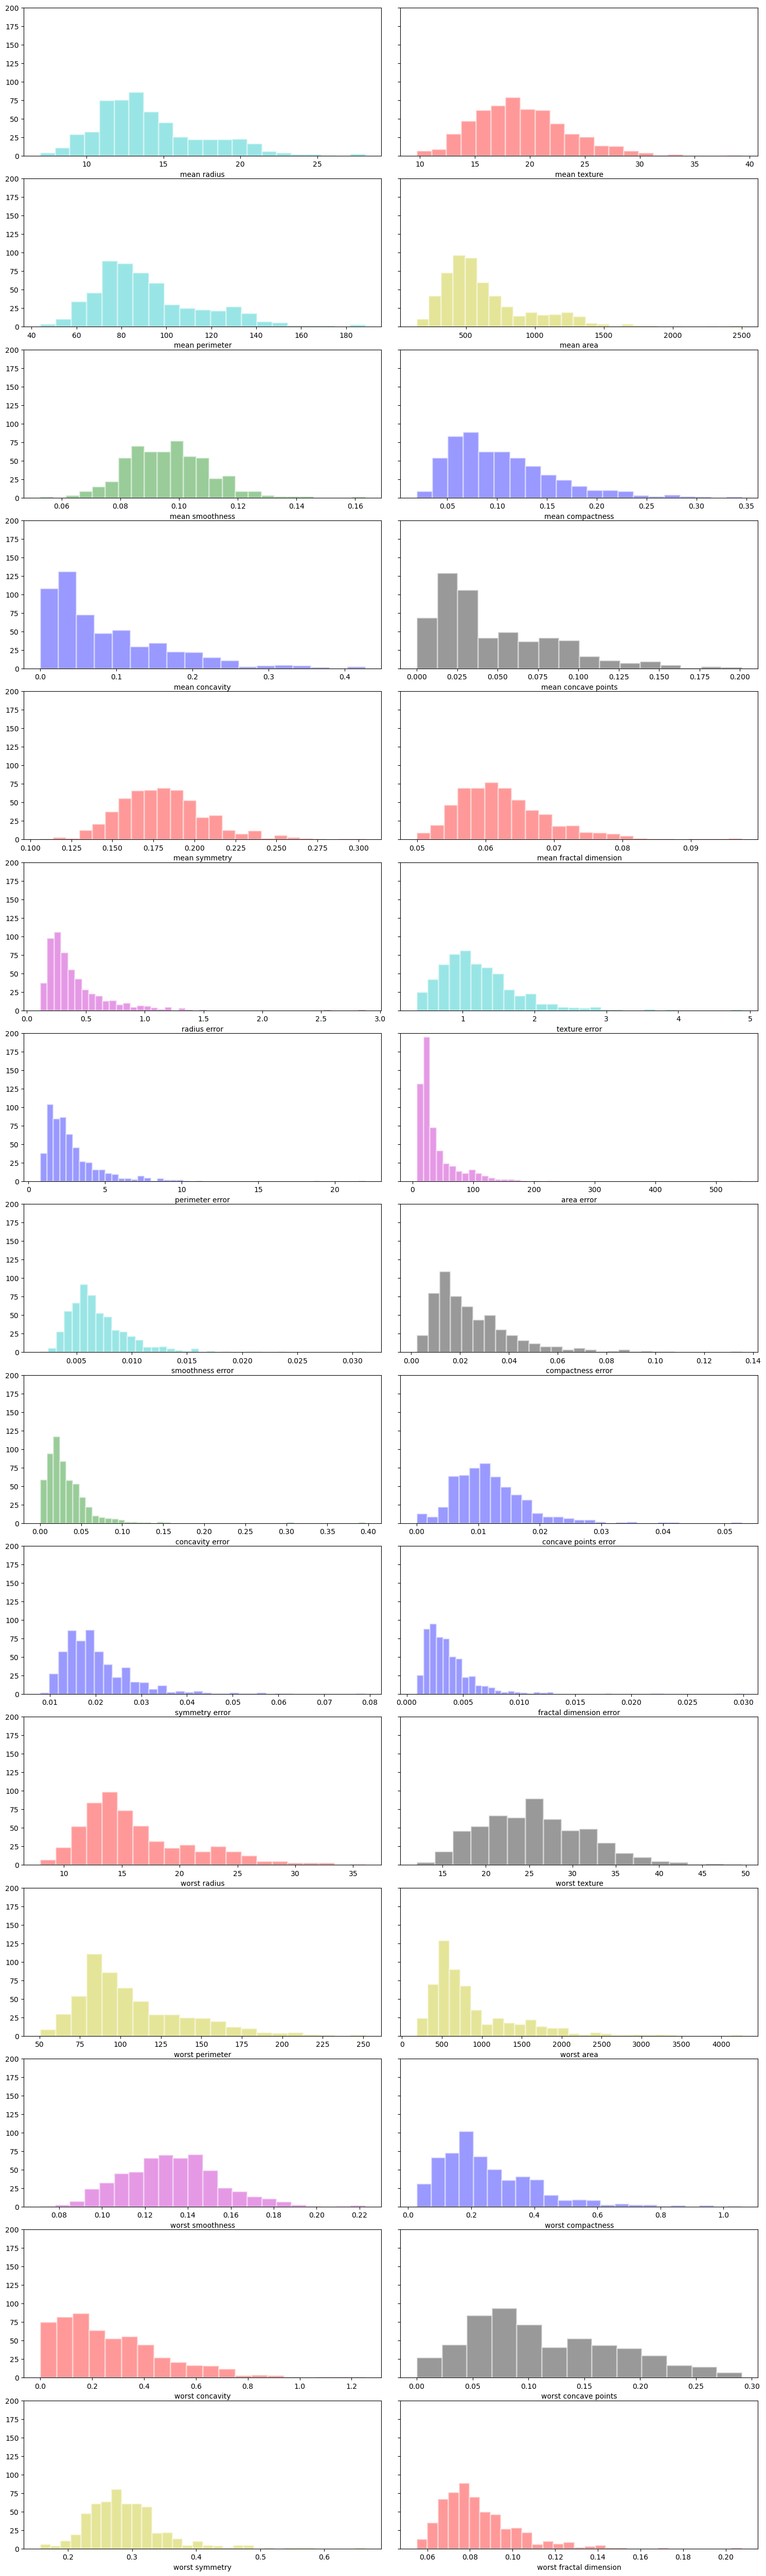

In [13]:
import numpy as np
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(df_breast_cancer.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(df_breast_cancer[df_breast_cancer.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

In [14]:
threshold = 0.8  # Set the correlation coefficient threshold

# Find pairs of features with a correlation coefficient above the threshold
corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j])
              for i in range(len(corr_matrix.columns))
              for j in range(i+1, len(corr_matrix.columns))
              if abs(corr_matrix.iloc[i, j]) > threshold]

# Create a list of unique features to keep
features_to_keep = []
for pair in corr_pairs:
    for feature in pair:
        if feature not in features_to_keep:
            features_to_keep.append(feature)

# Create a new DataFrame with only the selected features
df_selected = df_breast_cancer[features_to_keep]
df_selected

mean radius  mean perimeter  mean area  mean concave points  \
0          17.99          122.80     1001.0              0.14710   
1          20.57          132.90     1326.0              0.07017   
2          19.69          130.00     1203.0              0.12790   
3          11.42           77.58      386.1              0.10520   
4          20.29          135.10     1297.0              0.10430   
..           ...             ...        ...                  ...   
564        21.56          142.00     1479.0              0.13890   
565        20.13          131.20     1261.0              0.09791   
566        16.60          108.30      858.1              0.05302   
567        20.60          140.10     1265.0              0.15200   
568         7.76           47.92      181.0              0.00000   

     worst radius  worst perimeter  worst area  mean texture  worst texture  \
0          25.380           184.60      2019.0         10.38          17.33   
1          24.990           158.80      1956.0         17.77          23.41   
2          23.570           152.50      1709.0         21.25          25.53   
3          14.910            98.87       567.7         20.38          26.50   
4          22.540           152.20      1575.0         14.34          16.67   
..            ...              ...         ...           ...            ...   
564        25.450           166.10      2027.0         22.39          26.40   
565        23.690           155.00      1731.0         28.25          38.25   
566        18.980           126.70      1124.0         28.08          34.12   
567        25.740           184.60      1821.0         29.33          39.42   
568         9.456            59.16       268.6         24.54          30.37   

     area error  ...  mean concavity  worst compactness  worst concavity  \
0        153.40  ...         0.30010            0.66560           0.7119   
1         74.08  ...         0.08690            0.18660           0.2416   
2         94.03  ...         0.19740            0.42450           0.4504   
3         27.23  ...         0.24140            0.86630           0.6869   
4         94.44  ...         0.19800            0.20500           0.4000   
..          ...  ...             ...                ...              ...   
564      158.70  ...         0.24390            0.21130           0.4107   
565       99.04  ...         0.14400            0.19220           0.3215   
566       48.55  ...         0.09251            0.30940           0.3403   
567       86.22  ...         0.35140            0.86810           0.9387   
568       19.15  ...         0.00000            0.06444           0.0000   

     worst concave points  radius error  perimeter error  compactness error  \
0                  0.2654        1.0950            8.589            0.04904   
1                  0.1860        0.5435            3.398            0.01308   
2                  0.2430        0.7456            4.585            0.04006   
3                  0.2575        0.4956            3.445            0.07458   
4                  0.1625        0.7572            5.438            0.02461   
..                    ...           ...              ...                ...   
564                0.2216        1.1760            7.673            0.02891   
565                0.1628        0.7655            5.203            0.02423   
566                0.1418        0.4564            3.425            0.03731   
567                0.2650        0.7260            5.772            0.06158   
568                0.0000        0.3857            2.548            0.00466   

     concavity error  fractal dimension error  worst fractal dimension  
0            0.05373                 0.006193                  0.11890  
1            0.01860                 0.003532                  0.08902  
2            0.03832                 0.004571                  0.08758  
3            0.05661                 0.009208                  0.17300  
4           

In [15]:
df_selected['target']=df_breast_cancer['target']
df_selected

C:\Users\HP\AppData\Local\Temp\ipykernel_7680\2115404261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['target']=df_breast_cancer['target']


mean radius  mean perimeter  mean area  mean concave points  \
0          17.99          122.80     1001.0              0.14710   
1          20.57          132.90     1326.0              0.07017   
2          19.69          130.00     1203.0              0.12790   
3          11.42           77.58      386.1              0.10520   
4          20.29          135.10     1297.0              0.10430   
..           ...             ...        ...                  ...   
564        21.56          142.00     1479.0              0.13890   
565        20.13          131.20     1261.0              0.09791   
566        16.60          108.30      858.1              0.05302   
567        20.60          140.10     1265.0              0.15200   
568         7.76           47.92      181.0              0.00000   

     worst radius  worst perimeter  worst area  mean texture  worst texture  \
0          25.380           184.60      2019.0         10.38          17.33   
1          24.990           158.80      1956.0         17.77          23.41   
2          23.570           152.50      1709.0         21.25          25.53   
3          14.910            98.87       567.7         20.38          26.50   
4          22.540           152.20      1575.0         14.34          16.67   
..            ...              ...         ...           ...            ...   
564        25.450           166.10      2027.0         22.39          26.40   
565        23.690           155.00      1731.0         28.25          38.25   
566        18.980           126.70      1124.0         28.08          34.12   
567        25.740           184.60      1821.0         29.33          39.42   
568         9.456            59.16       268.6         24.54          30.37   

     area error  ...  worst compactness  worst concavity  \
0        153.40  ...            0.66560           0.7119   
1         74.08  ...            0.18660           0.2416   
2         94.03  ...            0.42450           0.4504   
3         27.23  ...            0.86630           0.6869   
4         94.44  ...            0.20500           0.4000   
..          ...  ...                ...              ...   
564      158.70  ...            0.21130           0.4107   
565       99.04  ...            0.19220           0.3215   
566       48.55  ...            0.30940           0.3403   
567       86.22  ...            0.86810           0.9387   
568       19.15  ...            0.06444           0.0000   

     worst concave points  radius error  perimeter error  compactness error  \
0                  0.2654        1.0950            8.589            0.04904   
1                  0.1860        0.5435            3.398            0.01308   
2                  0.2430        0.7456            4.585            0.04006   
3                  0.2575        0.4956            3.445            0.07458   
4                  0.1625        0.7572            5.438            0.02461   
..                    ...           ...              ...                ...   
564                0.2216        1.1760            7.673            0.02891   
565                0.1628        0.7655            5.203            0.02423   
566                0.1418        0.4564            3.425            0.03731   
567                0.2650        0.7260            5.772            0.06158   
568                0.0000        0.3857            2.548            0.00466   

     concavity error  fractal dimension error  worst fractal dimension  target  
0            0.05373                 0.006193                  0.11890       0  
1            0.01860                 0.003532                  0.08902       0  
2            0.03832                 0.004571                  0.08758       0  
3            0.05661                 0.009208                  0.17300       0  
4            0.05688                 0.005115                  0.07678       0  
..               ...                      ...                      ...     ...  
56

In [16]:
column_names_list = df_selected.columns.tolist()

print(column_names_list)

['mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'mean texture', 'worst texture', 'area error', 'mean smoothness', 'worst smoothness', 'mean compactness', 'mean concavity', 'worst compactness', 'worst concavity', 'worst concave points', 'radius error', 'perimeter error', 'compactness error', 'concavity error', 'fractal dimension error', 'worst fractal dimension', 'target']


As the heat map shows according to the color distribution and considering the threshold value more than 0.8 we have selected high related columns from the dataset. The selected columns are 'mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'mean texture', 'worst texture', 'area error', 'mean smoothness', 'worst smoothness', 'mean compactness', 'mean concavity', 'worst compactness', 'worst concavity', 'worst concave points', 'radius error', 'perimeter error', 'compactness error', 'concavity error', 'fractal dimension error', 'worst fractal dimension'. So the python code and the heat map shows the same selection.

In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into X and y
X = df_selected.drop(['target'], axis=1)
y = df_selected['target']

# Split X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

#### 3 Investigate a few decision tree classifiers with different hyperparameters

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier with default hyperparameters
dt = DecisionTreeClassifier(random_state=123)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [19]:
# Make predictions on the training and test sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

# Calculate accuracy scores for the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

Training accuracy: 1.000
Test accuracy: 0.965


This shows that the classifier is very good at fitting the training data but may not be particularly good at generalising to brand-new, untried data. In other words, the classifier might have been too adept at classifying the training data, which might have included noise or outliers that weren't present in the test set. As a result, on fresh data that it hasn't seen before, the classifier could not perform as well.

In order to obtain a more precise estimation of the model's performance on unknown data, we can utilise cross-validation to determine whether the classifier is overfitting. By doing this, we can evaluate the model's performance on various data folds and identify any overfitting issues.

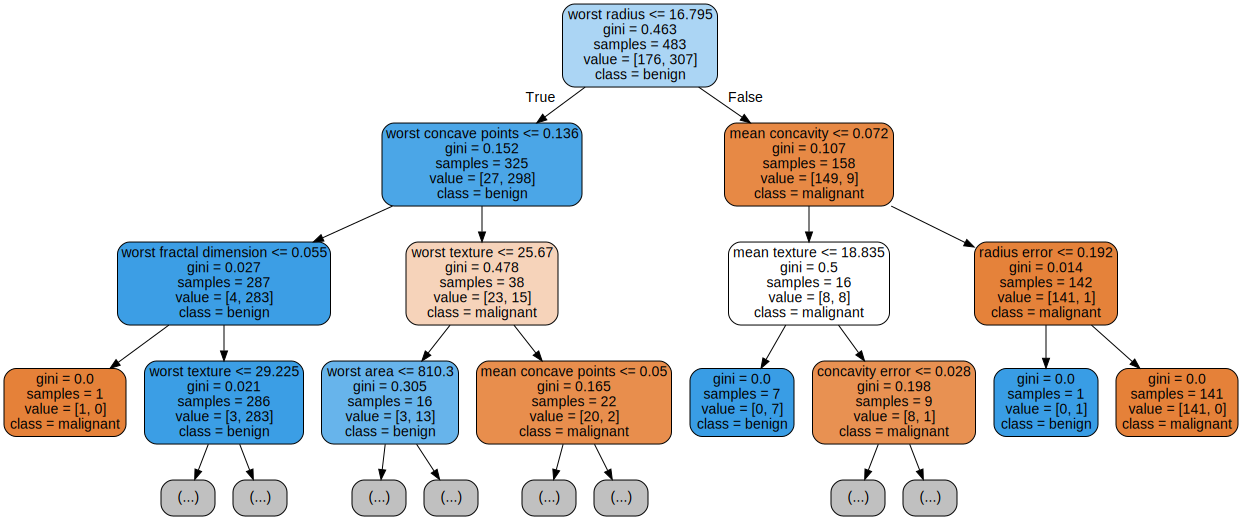

In [21]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        dt,
        out_file=str("breastcancer.dot"),
        feature_names=X.columns,
        class_names=['malignant','benign'],
        rounded=True,
        filled=True,
        max_depth=3
    )

Source.from_file("breastcancer.dot")

From the tree graph also we can see the model with default value is overfitting as there are more samples with more gini impurity and only a very few samples have 0 gini impurity. The tree is overfitting to the training data since it has numerous redundant branches that do not improve classification performance.

In [22]:
# Train a decision tree classifier with max_depth=3
dt_dpth3 = DecisionTreeClassifier(max_depth=3,random_state=123)
dt_dpth3.fit(X_train, y_train)

# Predict on training and test sets
train_preds2 = dt_dpth3.predict(X_train)
test_preds2 = dt_dpth3.predict(X_test)

# Calculate accuracy scores
train_acc2 = accuracy_score(y_train, train_preds2)
test_acc2 = accuracy_score(y_test, test_preds2)

# Print accuracy scores
print("Training accuracy: {:.3f}".format(train_acc2))
print("Test accuracy: {:.3f}".format(test_acc2))

Training accuracy: 0.981
Test accuracy: 0.965


The test accuracy is same, indicating that the model is same at generalising to new data, but the training accuracy is slightly lower (0.981 vs 1.000), indicating that the model is less likely to overfit.

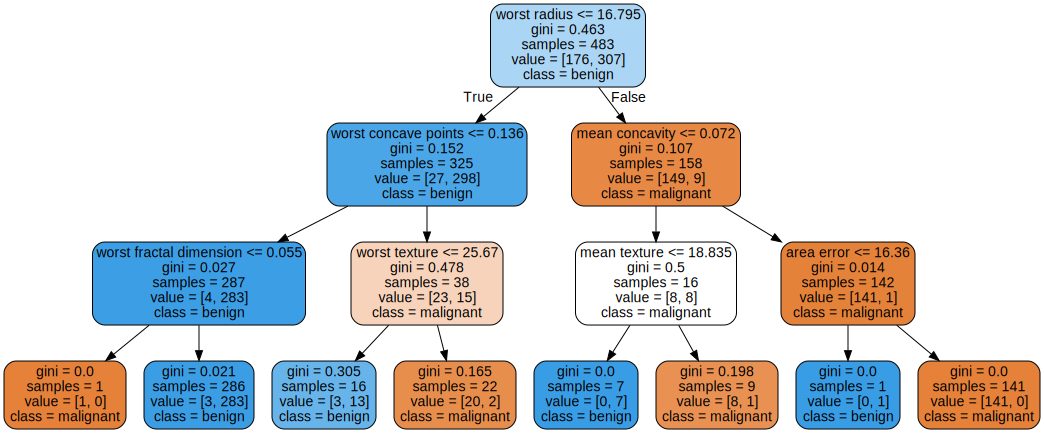

In [23]:
export_graphviz(
        dt_dpth3,
        out_file=str("breastcancer.dot"),
        feature_names=X.columns,
        class_names=['malignant','benign'],
        rounded=True,
        filled=True
    )

Source.from_file("breastcancer.dot")

In [24]:
# Train a decision tree classifier with min_samples_split=5
dt_min5 = DecisionTreeClassifier(min_samples_split=5,max_depth=3,random_state=123)
dt_min5.fit(X_train, y_train)

# Predict on training and test sets
train_preds3 = dt_min5.predict(X_train)
test_preds3 = dt_min5.predict(X_test)

# Calculate accuracy scores
train_acc3 = accuracy_score(y_train, train_preds3)
test_acc3 = accuracy_score(y_test, test_preds3)

# Print accuracy scores
print("Training accuracy: {:.3f}".format(train_acc3))
print("Test accuracy: {:.3f}".format(test_acc3))

Training accuracy: 0.981
Test accuracy: 0.965


This classifier has a min_samples_split of 5, which means that a node must have at least 5 samples to be split. This hyperparameter can also help prevent overfitting by preventing small nodes from being split. As from the tree graph we can see no leaf node has less than 5 samples, thats why this classifier makes no improvement from the prevoius one.

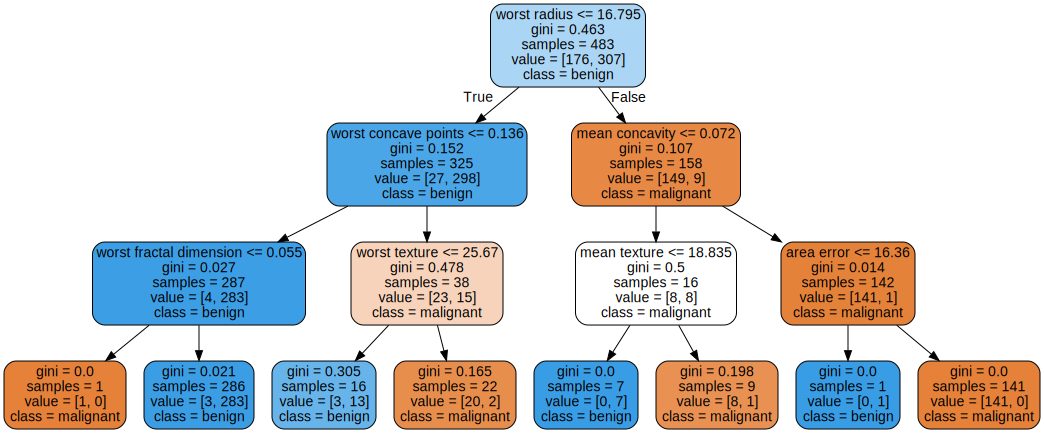

In [25]:
export_graphviz(
        dt_min5,
        out_file=str("breastcancer.dot"),
        feature_names=X.columns,
        class_names=['malignant','benign'],
        rounded=True,
        filled=True
    )

Source.from_file("breastcancer.dot")

In [26]:
# Create Decision Tree classifer object with min_samples_leaf=5
dt4 = DecisionTreeClassifier(min_samples_split=5,max_depth=3,random_state=123, min_samples_leaf=5)

# Train the classifier using the training set
dt4.fit(X_train, y_train)

# Make predictions on the training set and calculate accuracy
train_pred = dt4.predict(X_train)
train_acc = dt4.score(X_train, y_train)
print("Training accuracy: {:.3f}".format(train_acc))

# Make predictions on the test set and calculate accuracy
test_pred = dt4.predict(X_test)
test_acc = dt4.score(X_test, y_test)
print("Test accuracy: {:.3f}".format(test_acc))

Training accuracy: 0.977
Test accuracy: 0.965


Classifier 1 (default hyperparameters): Training accuracy: 1.000, Test accuracy: 0.965
Classifier 2 (max_depth=3): Training accuracy: 0.981, Test accuracy: 0.965
Classifier 3 (min_samples_split=5): Training accuracy: 0.981, Test accuracy: 0.965
Classifier 4 (min_samples_leaf=5): Training accuracy: 0.977, Test accuracy: 0.965
As classifier 4 has lower difference between training and testing accuracy, we can say that this one is the best amoung these classifier for this specific dataset.

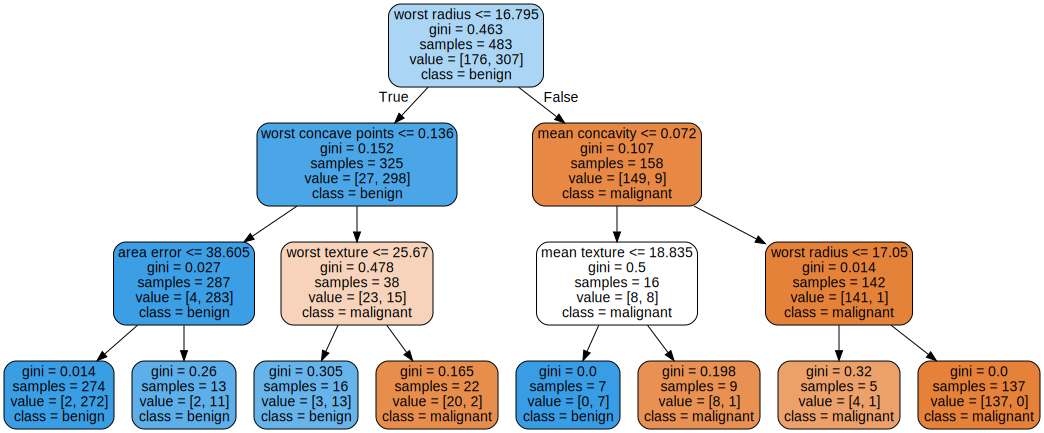

In [27]:
export_graphviz(
        dt4,
        out_file=str("breastcancer.dot"),
        feature_names=X.columns,
        class_names=['malignant','benign'],
        rounded=True,
        filled=True
    )

Source.from_file("breastcancer.dot")

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(dt, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9420289855072465


The grid search with 3-fold cross-validation gives the best score of 0.94, which is lower than the accuracy values from the previous classifiers. This shows that the initial classifier's default values for the hyperparameters may have previously been appropriate for this particular dataset.

In [29]:
# Get the class names from the dataset
class_names = df_selected.target.tolist()
class_names

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a new decision tree classifier with the best hyperparameters
dt_final = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=123)

# Fit the classifier to the training set
dt_final.fit(X_train, y_train)

# Evaluate the classifier on the training set
y_train_pred = dt_final.predict(X_train)
train_accuracy = dt_final.score(X_train, y_train)
print('Training accuracy:', train_accuracy)
print('Training confusion matrix:')
target_names = ['Benign', 'Malignant']
cm=confusion_matrix(y_train, y_train_pred, labels=[0, 1])

# Compute the confusion matrix using the labels parameter
labels = ['Benign', 'Malignant']

# Add class names to the confusion matrix
cm_with_labels = np.concatenate((np.array([labels]).T, cm), axis=1)
cm_with_labels = np.concatenate((np.array([['', 'Predicted ' + labels[0], 'Predicted ' + labels[1]]]), cm_with_labels), axis=0)

# Print the confusion matrix with class names

print(cm_with_labels)

classification_rep_train = classification_report(y_train, y_train_pred, target_names=target_names)

print('Train classification report:')
print(classification_rep_train)

# Evaluate the classifier on the test set
y_test_pred = dt_final.predict(X_test)
test_accuracy = dt_final.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Test confusion matrix:')
cm_test=confusion_matrix(y_test, y_test_pred)
# Add class names to the confusion matrix
cm_with_labels_test = np.concatenate((np.array([labels]).T, cm_test), axis=1)
cm_with_labels_test = np.concatenate((np.array([['', 'Predicted ' + labels[0], 'Predicted ' + labels[1]]]),cm_with_labels_test), axis=0)

# Print the confusion matrix with class names

print(cm_with_labels_test)

# Generate the classification report

classification_rep = classification_report(y_test, y_test_pred, target_names=target_names)

print('Test classification report:')
print(classification_rep)

Training accuracy: 0.9813664596273292
Training confusion matrix:
[['' 'Predicted Benign' 'Predicted Malignant']
 ['Benign' '170' '6']
 ['Malignant' '3' '304']]
Train classification report:
              precision    recall  f1-score   support

      Benign       0.98      0.97      0.97       176
   Malignant       0.98      0.99      0.99       307

    accuracy                           0.98       483
   macro avg       0.98      0.98      0.98       483
weighted avg       0.98      0.98      0.98       483

Test accuracy: 0.9651162790697675
Test confusion matrix:
[['' 'Predicted Benign' 'Predicted Malignant']
 ['Benign' '34' '2']
 ['Malignant' '1' '49']]
Test classification report:
              precision    recall  f1-score   support

      Benign       0.97      0.94      0.96        36
   Malignant       0.96      0.98      0.97        50

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97 

This classifier was trained to categorise tumours as benign or malignant using data from a breast cancer dataset. The classifier works well on the training data, as its training accuracy is 0.981 . High precision, recall, and F1-scores for both classes are also shown in the confusion matrix and classification report on the training data, indicating that the classifier is capable of efficiently differentiating between malignant and benign tumours.
The classifier has an accuracy of 0.965 on the test data, which is marginally lower than the accuracy during training. High precision, recall, and F1-scores are still present for both classes in the confusion matrix and classification report on the test data, demonstrating that the classifier generalises effectively to new data.
Overall, the breast cancer dataset shows that this classifier does well, properly categorising the majority of tumours as either malignant or benign. However, it is important to note that the performance of any classifier depends on the quality and representativeness of the dataset it is trained on, as well as the specific hyperparameter and algorithms used for classification.

# Concrete Slump Test

The "Concrete Slump Test" dataset available at the link provided contains data related to the slump test, which is a measure of the workability of fresh concrete. The data was collected from 103 samples of concrete used in a laboratory experiment in which the amount of water, cement, and other materials used in the mixture was varied.

The dataset consists of 7 input variables and 3 output variables. The input variables are:

Cement (kg/m^3): The amount of cement used in the mixture.
Slag (kg/m^3): The amount of slag (a by-product of steel production) used in the mixture.
Fly ash (kg/m^3): The amount of fly ash (a by-product of coal combustion) used in the mixture.
Water (kg/m^3): The amount of water used in the mixture.
Superplasticizer (kg/m^3): The amount of superplasticizer (a chemical additive used to improve workability) used in the mixture.
Coarse Aggregate (kg/m^3): The amount of coarse aggregate (e.g., gravel) used in the mixture.
Fine Aggregate (kg/m^3): The amount of fine aggregate (e.g., sand) used in the mixture.
The output variables are:

Slump (cm): The measure of workability of fresh concrete, which is the vertical displacement of the concrete when the cone used in the slump test is removed.
Flow (cm): The horizontal spread of the concrete after the cone is removed.
28-day Compressive Strength (MPa): The compressive strength of the concrete after 28 days of hardening.
The dataset also includes summary statistics and correlations between the input and output variables, as well as scatter plots and histograms for each variable.
As "SLUMP(cm)", "FLOW(cm)" is removed as we are not interested in these two.

In [31]:
file_path = os.path.join(os.getcwd(), 'slump_test.data')  
df_concrete = pd.read_csv(file_path)
df_concrete

No  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  \
0      1   273.0   82.0    105.0  210.0   9.0         904.0       680.0   
1      2   163.0  149.0    191.0  180.0  12.0         843.0       746.0   
2      3   162.0  148.0    191.0  179.0  16.0         840.0       743.0   
3      4   162.0  148.0    190.0  179.0  19.0         838.0       741.0   
4      5   154.0  112.0    144.0  220.0  10.0         923.0       658.0   
..   ...     ...    ...      ...    ...   ...           ...         ...   
98    99   248.3  101.0    239.1  168.9   7.7         954.2       640.6   
99   100   248.0  101.0    239.9  169.1   7.7         949.9       644.1   
100  101   258.8   88.0    239.6  175.3   7.6         938.9       646.0   
101  102   297.1   40.9    239.9  194.0   7.5         908.9       651.8   
102  103   348.7    0.1    223.1  208.5   9.6         786.2       758.1   

     SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0         23.0      62.0                               34.99  
1          0.0      20.0                               41.14  
2          1.0      20.0                               41.81  
3          3.0      21.5                               42.08  
4         20.0      64.0                               26.82  
..         ...       ...                                 ...  
98         0.0      20.0                               49.97  
99         2.0      20.0                               50.23  
100        0.0      20.0                               50.50  
101       27.5      67.0                               49.17  
102       29.0      78.0                               48.77  

[103 rows x 11 columns]

In [32]:
# drop unnecessary columns
df_concrete = df_concrete.drop(columns=["SLUMP(cm)", "FLOW(cm)"], axis=1)
df_concrete

No  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  \
0      1   273.0   82.0    105.0  210.0   9.0         904.0       680.0   
1      2   163.0  149.0    191.0  180.0  12.0         843.0       746.0   
2      3   162.0  148.0    191.0  179.0  16.0         840.0       743.0   
3      4   162.0  148.0    190.0  179.0  19.0         838.0       741.0   
4      5   154.0  112.0    144.0  220.0  10.0         923.0       658.0   
..   ...     ...    ...      ...    ...   ...           ...         ...   
98    99   248.3  101.0    239.1  168.9   7.7         954.2       640.6   
99   100   248.0  101.0    239.9  169.1   7.7         949.9       644.1   
100  101   258.8   88.0    239.6  175.3   7.6         938.9       646.0   
101  102   297.1   40.9    239.9  194.0   7.5         908.9       651.8   
102  103   348.7    0.1    223.1  208.5   9.6         786.2       758.1   

     Compressive Strength (28-day)(Mpa)  
0                                 34.99  
1                                 41.14  
2                                 41.81  
3                                 42.08  
4                                 26.82  
..                                  ...  
98                                49.97  
99                                50.23  
100                               50.50  
101                               49.17  
102                               48.77  

[103 rows x 9 columns]

In [33]:
# drop rows with null values
df_concrete = df_concrete.dropna()
df_concrete

No  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  \
0      1   273.0   82.0    105.0  210.0   9.0         904.0       680.0   
1      2   163.0  149.0    191.0  180.0  12.0         843.0       746.0   
2      3   162.0  148.0    191.0  179.0  16.0         840.0       743.0   
3      4   162.0  148.0    190.0  179.0  19.0         838.0       741.0   
4      5   154.0  112.0    144.0  220.0  10.0         923.0       658.0   
..   ...     ...    ...      ...    ...   ...           ...         ...   
98    99   248.3  101.0    239.1  168.9   7.7         954.2       640.6   
99   100   248.0  101.0    239.9  169.1   7.7         949.9       644.1   
100  101   258.8   88.0    239.6  175.3   7.6         938.9       646.0   
101  102   297.1   40.9    239.9  194.0   7.5         908.9       651.8   
102  103   348.7    0.1    223.1  208.5   9.6         786.2       758.1   

     Compressive Strength (28-day)(Mpa)  
0                                 34.99  
1                                 41.14  
2                                 41.81  
3                                 42.08  
4                                 26.82  
..                                  ...  
98                                49.97  
99                                50.23  
100                               50.50  
101                               49.17  
102                               48.77  

[103 rows x 9 columns]

####  Perform some basic visualisation and determine whether any additional features should be removed also.

In [34]:
# Basic statistics
print(df_concrete.describe())

               No      Cement        Slag     Fly ash       Water          SP  \
count  103.000000  103.000000  103.000000  103.000000  103.000000  103.000000   
mean    52.000000  229.894175   77.973786  149.014563  197.167961    8.539806   
std     29.877528   78.877230   60.461363   85.418080   20.208158    2.807530   
min      1.000000  137.000000    0.000000    0.000000  160.000000    4.400000   
25%     26.500000  152.000000    0.050000  115.500000  180.000000    6.000000   
50%     52.000000  248.000000  100.000000  164.000000  196.000000    8.000000   
75%     77.500000  303.900000  125.000000  235.950000  209.500000   10.000000   
max    103.000000  374.000000  193.000000  260.000000  240.000000   19.000000   

       Coarse Aggr.  Fine Aggr.  Compressive Strength (28-day)(Mpa)  
count    103.000000  103.000000                          103.000000  
mean     883.978641  739.604854                           36.039417  
std       88.391393   63.342117                            7

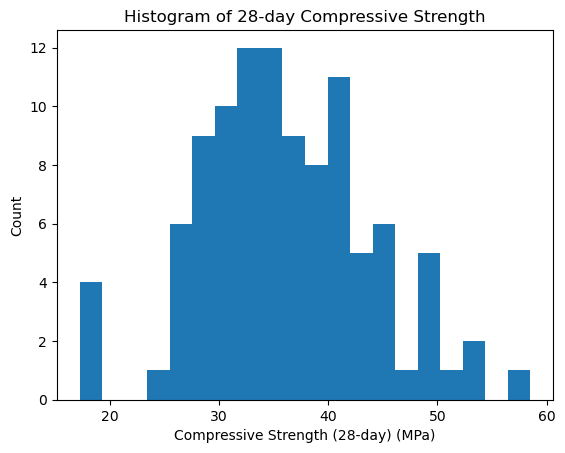

In [35]:
# Histogram of the 28-day Compressive Strength
plt.hist(df_concrete['Compressive Strength (28-day)(Mpa)'], bins=20)
plt.xlabel('Compressive Strength (28-day) (MPa)')
plt.ylabel('Count')
plt.title('Histogram of 28-day Compressive Strength')
plt.show()

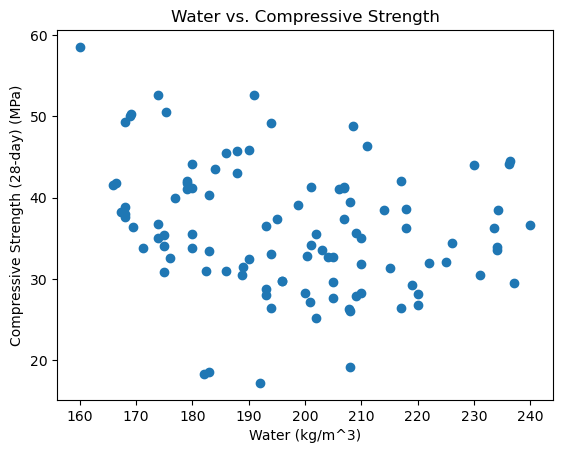

In [36]:
# Scatter plot of Water vs. Compressive Strength
plt.scatter(df_concrete['Water'], df_concrete['Compressive Strength (28-day)(Mpa)'])
plt.xlabel('Water (kg/m^3)')
plt.ylabel('Compressive Strength (28-day) (MPa)')
plt.title('Water vs. Compressive Strength')
plt.show()

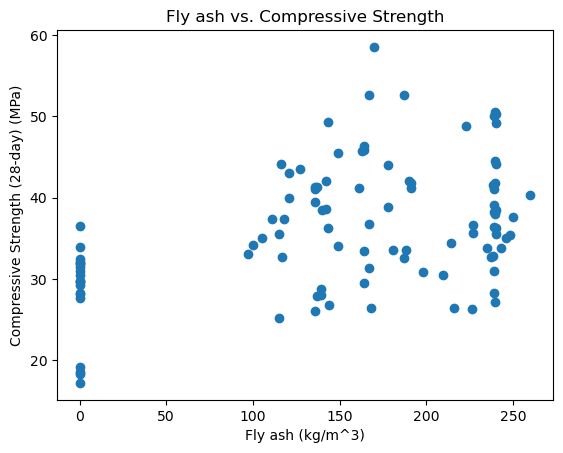

In [37]:
# Scatter plot of Fly ash vs. Compressive Strength
plt.scatter(df_concrete['Fly ash'], df_concrete['Compressive Strength (28-day)(Mpa)'])
plt.xlabel('Fly ash (kg/m^3)')
plt.ylabel('Compressive Strength (28-day) (MPa)')
plt.title('Fly ash vs. Compressive Strength')
plt.show()

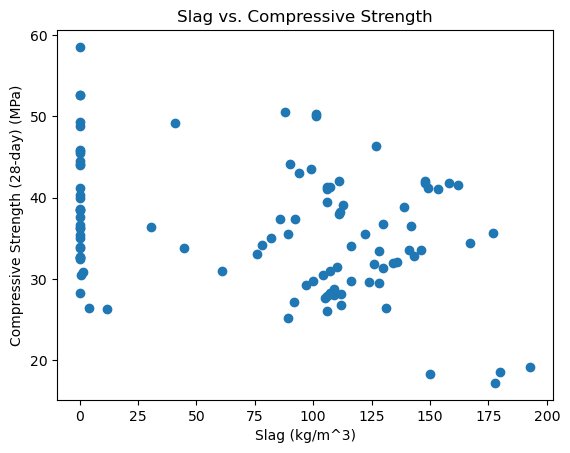

In [38]:
# Scatter plot of Slag vs. Compressive Strength
plt.scatter(df_concrete['Slag'], df_concrete['Compressive Strength (28-day)(Mpa)'])
plt.xlabel('Slag (kg/m^3)')
plt.ylabel('Compressive Strength (28-day) (MPa)')
plt.title('Slag vs. Compressive Strength')
plt.show()

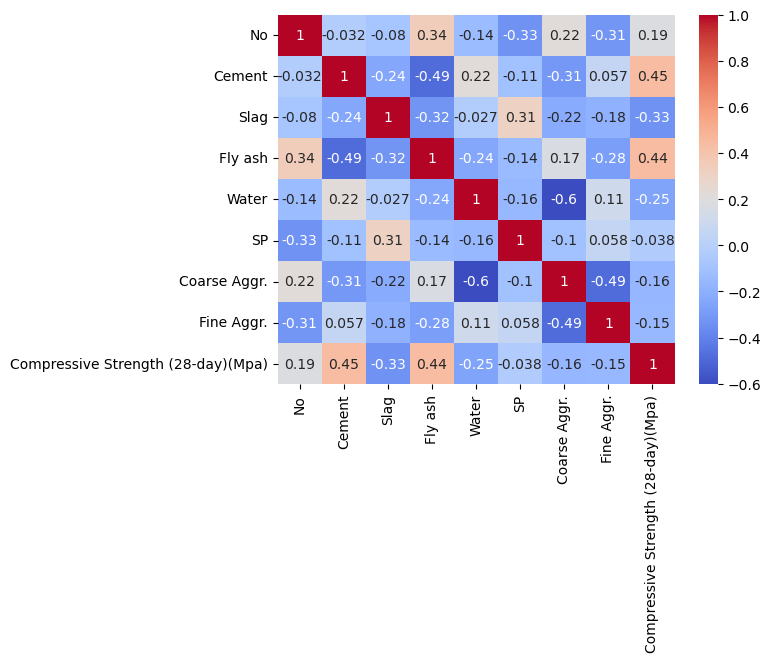

In [39]:
# check correlation of features
corr = df_concrete.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

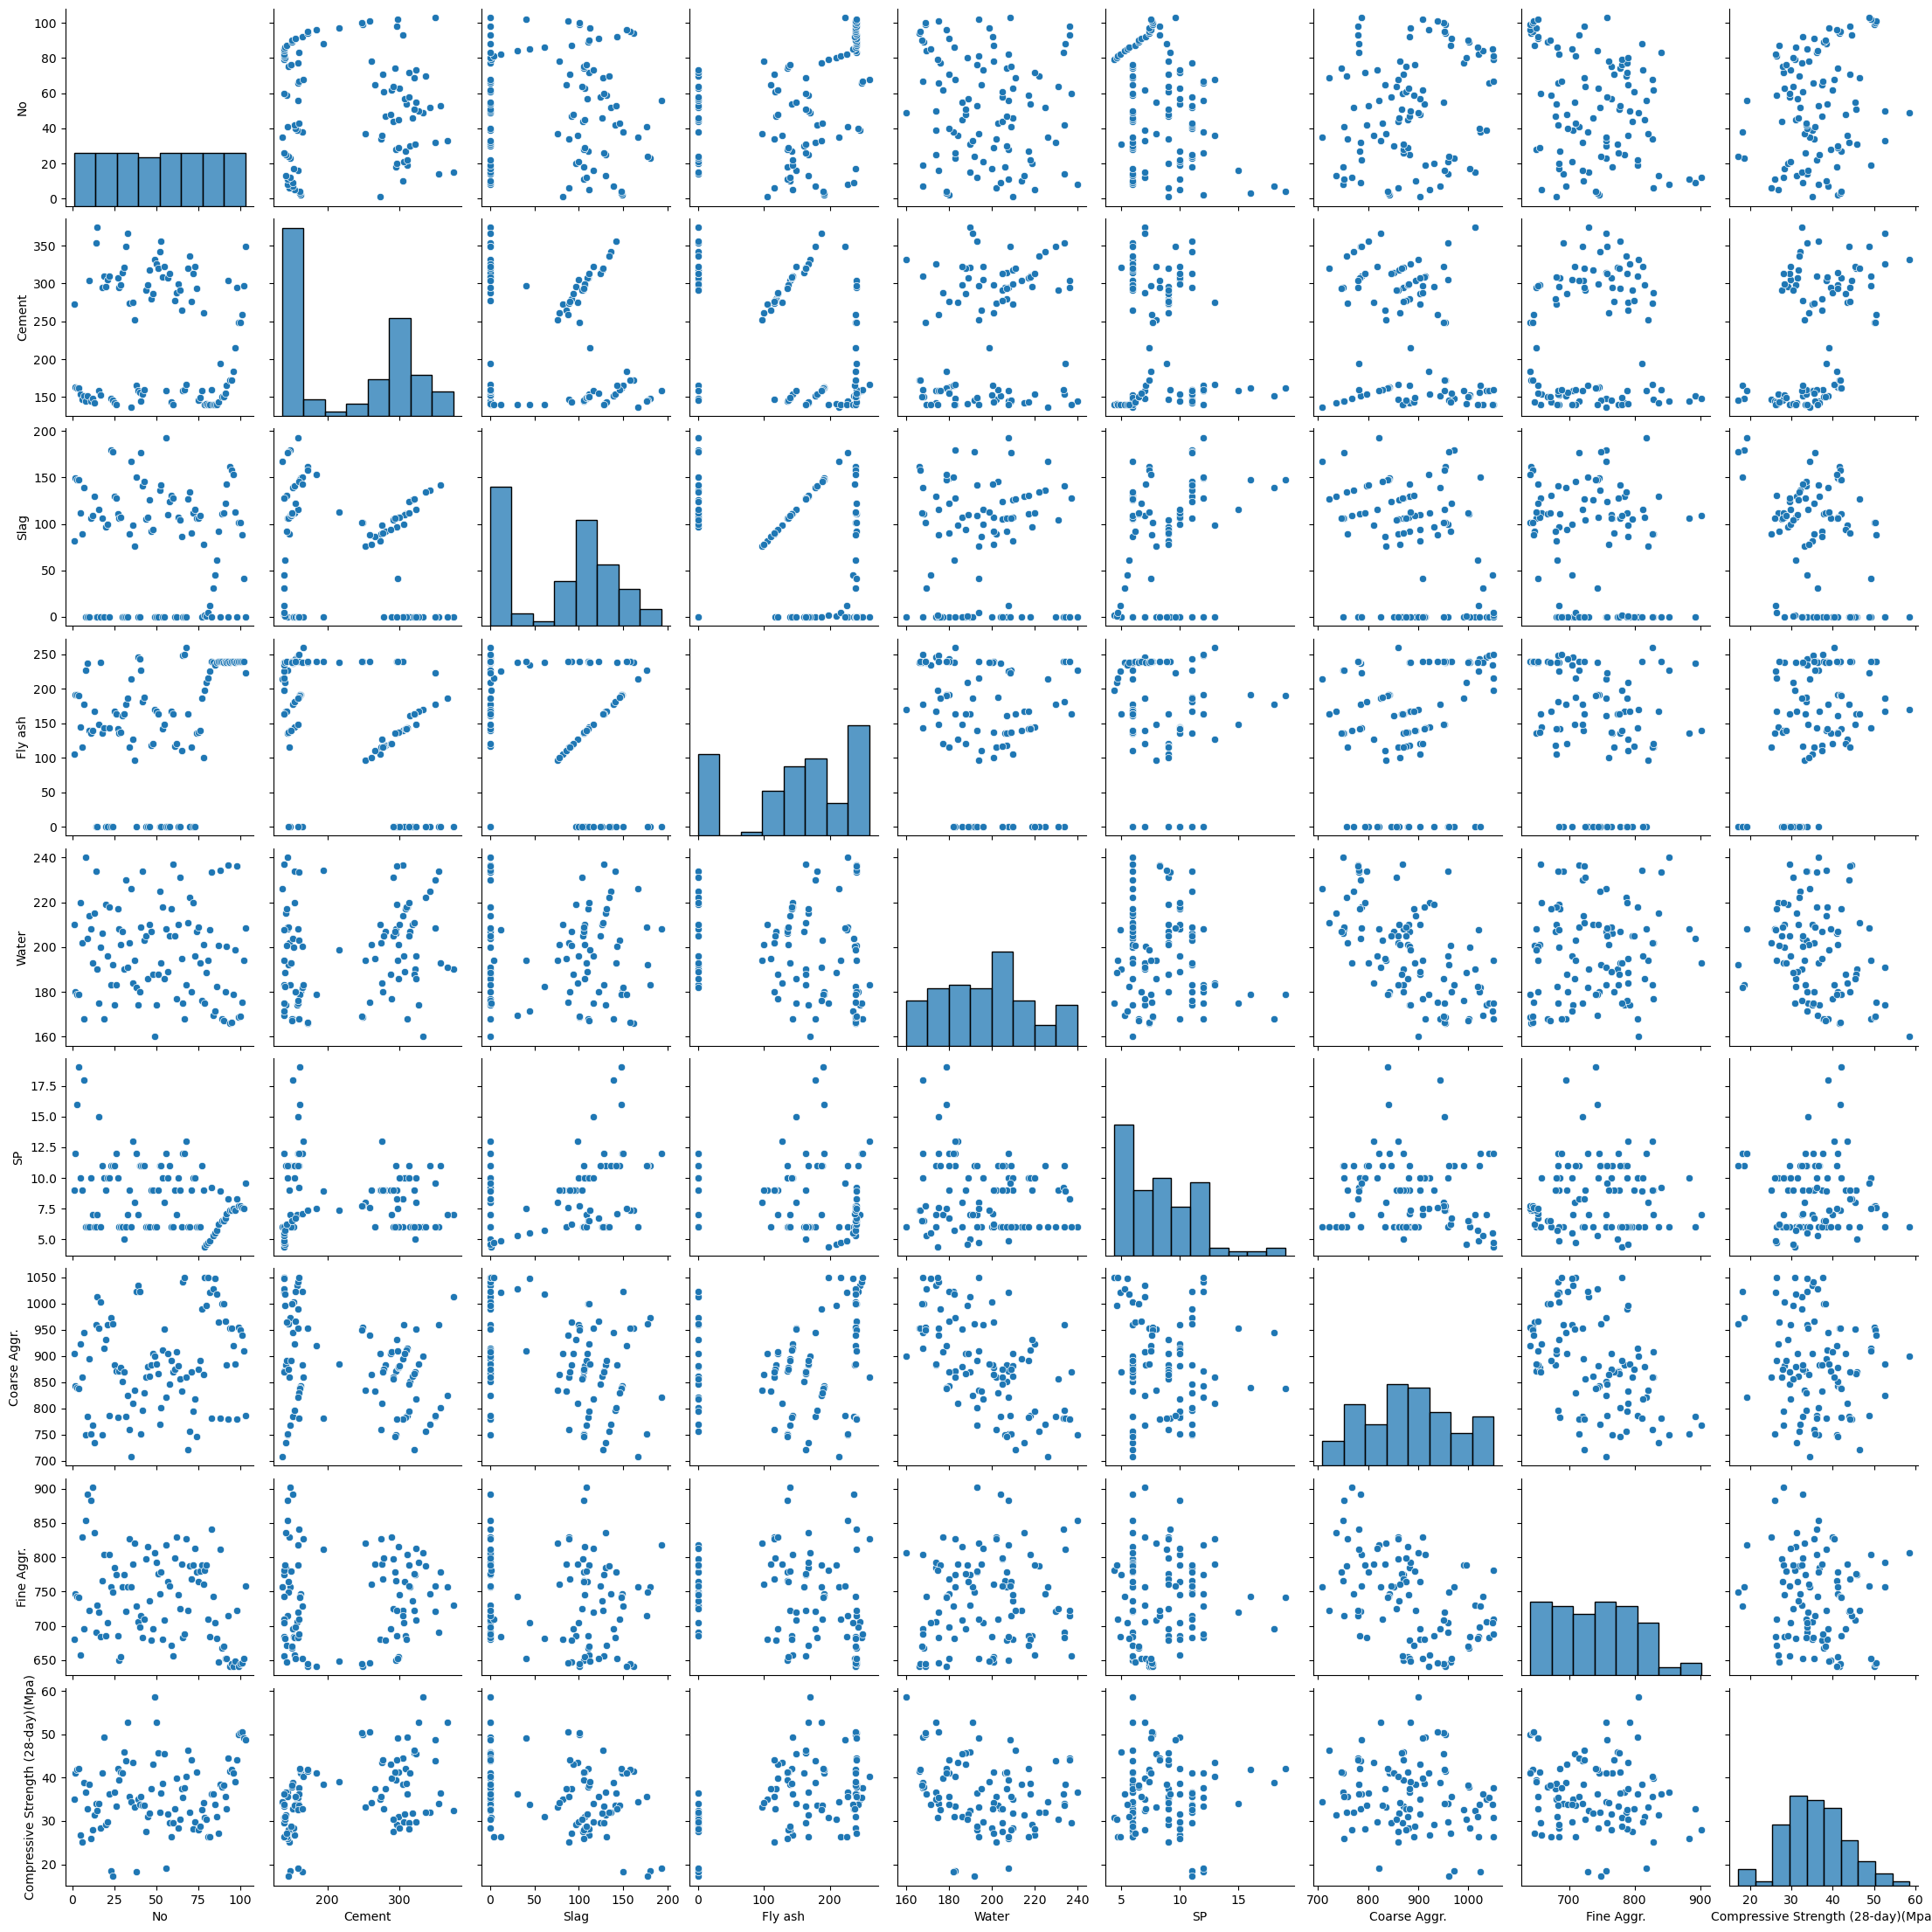

In [40]:
# Pairplot of all variables
sns.pairplot(df_concrete)
plt.show()

These visualisations suggest that no further characteristics should be eliminated. None of the remaining input variables appear to have any significant difficulties with data quality or outliers, and they all exhibit some degree of correlation with the 28-day Compressive Strength output.

In [41]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit the scaler object on the feature data
scaled_features = scaler.fit_transform(df_concrete.drop(columns=["Compressive Strength (28-day)(Mpa)"]))

# create a new dataframe with the scaled features
df_concrete_scaled = pd.DataFrame(scaled_features, columns=df_concrete.columns[:-1])

# add the 28-day Compressive Strength column back to the scaled dataframe
df_concrete_scaled["Compressive Strength (28-day)(Mpa)"] = df_concrete["Compressive Strength (28-day)(Mpa)"]
df_concrete_scaled

No    Cement      Slag   Fly ash     Water        SP  Coarse Aggr.  \
0   -1.715316  0.549165  0.066917 -0.517804  0.638098  0.164716      0.227616   
1   -1.681682 -0.852227  1.180482  0.493932 -0.853710  1.238496     -0.465871   
2   -1.648048 -0.864967  1.163861  0.493932 -0.903437  2.670203     -0.499977   
3   -1.614415 -0.864967  1.163861  0.482168 -0.903437  3.743983     -0.522715   
4   -1.580781 -0.966886  0.565528 -0.058993  1.135368  0.522643      0.443620   
..        ...       ...       ...       ...       ...       ...           ...   
98   1.580781  0.234489  0.382704  1.059799 -1.405679 -0.300589      0.798321   
99   1.614415  0.230667  0.382704  1.069210 -1.395734 -0.300589      0.749436   
100  1.648048  0.368258  0.166639  1.065681 -1.087427 -0.336382      0.624381   
101  1.681682  0.856197 -0.616180  1.069210 -0.157533 -0.372174      0.283322   
102  1.715316  1.513577 -1.294291  0.871569  0.563508  0.379472     -1.111610   

     Fine Aggr.  Compressive Strength (28-day)(Mpa)  
0     -0.945600                               34.99  
1      0.101456                               41.14  
2      0.053862                               41.81  
3      0.022133                               42.08  
4     -1.294619                               26.82  
..          ...                                 ...  
98    -1.570661                               49.97  
99    -1.515135                               50.23  
100   -1.484993                               50.50  
101   -1.392979                               49.17  
102    0.293416                               48.77  

[103 rows x 9 columns]

In [42]:
# drop rows with null values
df_concrete_scaled = df_concrete_scaled.dropna()
df_concrete_scaled

No    Cement      Slag   Fly ash     Water        SP  Coarse Aggr.  \
0   -1.715316  0.549165  0.066917 -0.517804  0.638098  0.164716      0.227616   
1   -1.681682 -0.852227  1.180482  0.493932 -0.853710  1.238496     -0.465871   
2   -1.648048 -0.864967  1.163861  0.493932 -0.903437  2.670203     -0.499977   
3   -1.614415 -0.864967  1.163861  0.482168 -0.903437  3.743983     -0.522715   
4   -1.580781 -0.966886  0.565528 -0.058993  1.135368  0.522643      0.443620   
..        ...       ...       ...       ...       ...       ...           ...   
98   1.580781  0.234489  0.382704  1.059799 -1.405679 -0.300589      0.798321   
99   1.614415  0.230667  0.382704  1.069210 -1.395734 -0.300589      0.749436   
100  1.648048  0.368258  0.166639  1.065681 -1.087427 -0.336382      0.624381   
101  1.681682  0.856197 -0.616180  1.069210 -0.157533 -0.372174      0.283322   
102  1.715316  1.513577 -1.294291  0.871569  0.563508  0.379472     -1.111610   

     Fine Aggr.  Compressive Strength (28-day)(Mpa)  
0     -0.945600                               34.99  
1      0.101456                               41.14  
2      0.053862                               41.81  
3      0.022133                               42.08  
4     -1.294619                               26.82  
..          ...                                 ...  
98    -1.570661                               49.97  
99    -1.515135                               50.23  
100   -1.484993                               50.50  
101   -1.392979                               49.17  
102    0.293416                               48.77  

[103 rows x 9 columns]

#### Perform a 80/20 random split on the dataset to form a training set and a test set. For Voting regressor, used the following as the 3 base estimators with default hyperparameters: (i) a linear SVM regressor, (ii) a linear regressor (using the LinearRegression class), and (iii) a Stochastic Gradient Descent regressor.

In [43]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_concrete_scaled.iloc[:, :-1], df_concrete_scaled.iloc[:, -1], test_size=0.2, random_state=42)


from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import VotingRegressor

# create base estimators
estimators = [('linear_svm', LinearSVR()),
              ('linear_regression', LinearRegression()),
              ('sgd_regressor', SGDRegressor())]

# create voting regressor
voting_regressor = VotingRegressor(estimators)

# fit voting regressor on training set
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_svm', LinearSVR()),
                            ('linear_regression', LinearRegression()),
                            ('sgd_regressor', SGDRegressor())])

#### Train the base estimators and the Voting regressor on the training set and compare their predicted 28-day Compressive Strength values for the test set. Report their RMSEs and illustrate the predicted values versus the ground truth values of all the test instances.

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# train base estimators
linear_svm = LinearSVR().fit(X_train, y_train)
linear_regression = LinearRegression().fit(X_train, y_train)
sgd_regressor = SGDRegressor().fit(X_train, y_train)

# predict on test set
linear_svm_preds = linear_svm.predict(X_test)
linear_regression_preds = linear_regression.predict(X_test)
sgd_regressor_preds = sgd_regressor.predict(X_test)
voting_regressor_preds = voting_regressor.predict(X_test)

# calculate RMSE
linear_svm_rmse = np.sqrt(mean_squared_error(y_test, linear_svm_preds))
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_preds))
sgd_regressor_rmse = np.sqrt(mean_squared_error(y_test, sgd_regressor_preds))
voting_regressor_rmse = np.sqrt(mean_squared_error(y_test, voting_regressor_preds))

print(f"Linear SVM RMSE: {linear_svm_rmse:.2f}")
print(f"Linear Regression RMSE: {linear_regression_rmse:.2f}")
print(f"SGD Regressor RMSE: {sgd_regressor_rmse:.2f}")
print(f"Voting Regressor RMSE: {voting_regressor_rmse:.2f}")

Linear SVM RMSE: 2.55
Linear Regression RMSE: 2.04
SGD Regressor RMSE: 2.05
Voting Regressor RMSE: 1.96


The results you provided show that the Voting Regressor model has the lowest RMSE (root mean squared error) compared to the other three models: Linear SVM, Linear Regression, and SGD Regressor. This means that the Voting Regressor model has the smallest average difference between the predicted values and the actual values of the 28-day Compressive Strength output variable. Therefore, it appears to be the best performing model among the four.

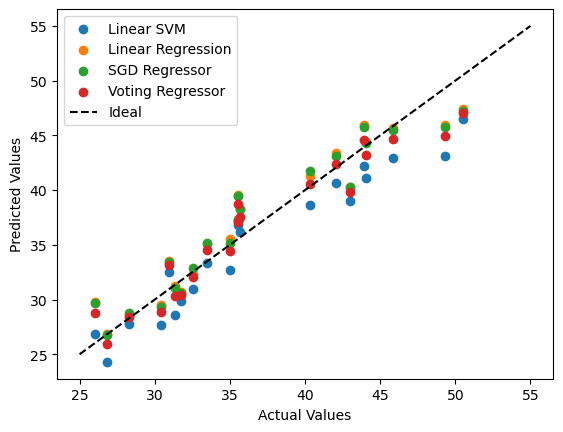

In [45]:
# plot predicted vs actual values for test set
plt.scatter(y_test, linear_svm_preds, label='Linear SVM')
plt.scatter(y_test, linear_regression_preds, label='Linear Regression')
plt.scatter(y_test, sgd_regressor_preds, label='SGD Regressor')
plt.scatter(y_test, voting_regressor_preds, label='Voting Regressor')
plt.plot([25, 55], [25, 55], 'k--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### Individually tune a few hyperparameters for each of these base estimators. Use 3-fold cross-validation with Grid-Search to select the best hyperparameters.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings

# Hide all warnings
warnings.filterwarnings('ignore')

#Grid-Search to select the best hyperparameters for SVM
# create a pipeline with StandardScaler and LinearSVR
pipe = make_pipeline(StandardScaler(), LinearSVR())

# define a grid of hyperparameters to search over
param_grid = {
    'linearsvr__C': [0.1, 1, 10, 100],
    'linearsvr__epsilon': [0.01, 0.1, 1, 10]
}

# create a GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error')

# fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", round(grid_search.best_score_,4))

Best hyperparameters: {'linearsvr__C': 10, 'linearsvr__epsilon': 0.1}
Best score: -8.7811


In [47]:
#Grid-Search to select the best hyperparameters for linear regression
# define a grid of hyperparameters to search over
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# create a GridSearchCV object
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=3, scoring='neg_mean_squared_error')

# fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", round(grid_search.best_score_,4))

Best hyperparameters: {'fit_intercept': True, 'positive': False}
Best score: -10.4488


In [48]:
#Grid-Search to select the best hyperparameters for SGD regressor
# define a grid of hyperparameters to search over
import warnings
from sklearn.exceptions import ConvergenceWarning

param_grid = {
    'loss': ['squared_loss', 'huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01]
}

# create a GridSearchCV object
grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')

# fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", round(grid_search.best_score_,4))

Best hyperparameters: {'alpha': 0.0001, 'loss': 'huber', 'penalty': 'elasticnet'}
Best score: -1329.6254


In [49]:
# create a LinearSVR model with selected hyperparameters and train on the training set
lin_svr = LinearSVR(C=10, epsilon=0.1)
lin_svr.fit(X_train, y_train)

# create a LinearRegression model with selected hyperparameters and train on the training set
lin_reg = LinearRegression(fit_intercept=True, positive=False)
lin_reg.fit(X_train, y_train)

# create a SGDRegressor model with selected hyperparameters and train on the training set
sgd_reg = SGDRegressor(alpha=0.0001, loss='huber', penalty='elasticnet')
sgd_reg.fit(X_train, y_train)

# create a VotingRegressor with the three trained base estimators
voting_reg = VotingRegressor([('lin_svr', lin_svr), ('lin_reg', lin_reg), ('sgd_reg', sgd_reg)])
voting_reg.fit(X_train, y_train)

# use the VotingRegressor to make predictions on the test set
y_pred_voting = voting_reg.predict(X_test)
y_pred_lin_svr = lin_svr.predict(X_test)
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_sgd_reg = sgd_reg.predict(X_test)

# compute the RMSE for each model
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
rmse_lin_svr = mean_squared_error(y_test, y_pred_lin_svr, squared=False)
rmse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
rmse_sgd_reg = mean_squared_error(y_test, y_pred_sgd_reg, squared=False)


# print the RMSE for each model
print("RMSE - Voting Regressor: {:.2f}".format(rmse_voting))
print("RMSE - LinearSVR:{:.2f}".format(rmse_lin_svr))
print("RMSE - Linear Regression:{:.2f}".format(rmse_lin_reg))
print("RMSE - SGD Regressor:{:.2f}".format(rmse_sgd_reg))

RMSE - Voting Regressor: 12.20
RMSE - LinearSVR:2.19
RMSE - Linear Regression:2.04
RMSE - SGD Regressor:36.70


Based on the hyperparameters and score values, it appears that the best performing model is the Linear Regression model, with a best score of -10.4488 and an RMSE of 2.04. The LinearSVR model also performed well, with a best score of -8.7046 and an RMSE of 2.19. The SGD Regressor model performed significantly bad, with an RMSE of 36.70, indicating that it may not be a good choice for this dataset.

The best hyperparameters for the LinearSVR model were C=10 and epsilon=0.1, indicating that the model is relatively insensitive to deviations from the target variable and is willing to tolerate more errors than the default settings. The best hyperparameters for the Linear Regression model were fit_intercept=True and positive=False, indicating that the model should fit an intercept and is not restricted to predicting only positive values. The best hyperparameters for the SGD Regressor model were alpha=0.0001, loss='huber', and penalty='l2', indicating that the model is using a Huber loss function and elasticnet regularization to prevent overfitting.

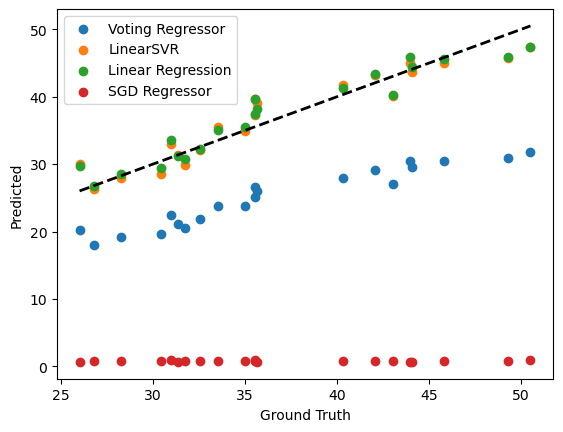

In [50]:
# plot the predicted values versus the ground truth values of all the test instances
plt.scatter(y_test, y_pred_voting, label='Voting Regressor')
plt.scatter(y_test, y_pred_lin_svr, label='LinearSVR')
plt.scatter(y_test, y_pred_lin_reg, label='Linear Regression')
plt.scatter(y_test, y_pred_sgd_reg, label='SGD Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Abalone dataset

The Abalone dataset is a collection of physical measurements of abalone, a type of sea snail, and is available on the UCI Machine Learning Repository. The dataset was contributed by Dr. Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford of the Marine Research Laboratories, Tasmania, Australia.

The dataset contains 4,177 data instances, each representing a unique abalone specimen. There are eight variables or features that describe each specimen:

Sex: the gender of the abalone, which can be "M" (male), "F" (female), or "I" (infant).
Length: the longest shell measurement (in mm).
Diameter: the measurement perpendicular to length (in mm).
Height: the height of the shell (in mm), with the meat inside.
Whole weight: the weight of the whole abalone (in grams).
Shucked weight: the weight of the meat (in grams) removed from the shell.
Viscera weight: the weight of the gut (in grams) after bleeding.
Shell weight: the weight of the shell (in grams) after being dried.
The target variable or response variable is the age of the abalone, which is determined by counting the number of rings on the shell. The age ranges from 1 to 29 years.

This dataset can be used to build regression models to predict the age of an abalone based on its physical measurements. It is useful for researchers and marine biologists who are interested in understanding the growth patterns of abalone and optimizing their harvest for aquaculture and fishing industries.

#### perform the usual data inspection and cleaning. Perform appropriate data preprocessing to the data, e.g.,the text column convert it into numerical values. 85/15 random splitted to form a training set and a test set.

In [51]:
file_path = os.path.join(os.getcwd(), 'abalone.data') 
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                'Viscera weight', 'Shell weight', 'Rings']
df_abalone = pd.read_csv(file_path,header=None, names=column_names)
df_abalone

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [52]:
# Check for missing values
print(df_abalone.isnull().sum())

# Check for duplicate rows
print(df_abalone.duplicated().sum())

# Summary statistics of the numerical features
print(df_abalone.describe())

# Check the distribution of the target variable
print(df_abalone['Rings'].value_counts())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
0
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  


In [53]:
# Separate the features and target variable
X = df_abalone.drop(['Sex', 'Rings'], axis=1)
y = df_abalone['Rings']
s = df_abalone['Sex']

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Create a new dataframe with the scaled features (excluding 'Sex' and 'Rings' columns)
df_abalone_scaled = pd.DataFrame(scaled_features, columns=df_abalone.columns[1:8])

# Append the target variable to the scaled dataframe
df_abalone_scaled['Sex'] = s
df_abalone_scaled['Rings'] = y
df_abalone_scaled

Length  Diameter    Height  Whole weight  Shucked weight  \
0    -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1    -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2     0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3    -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4    -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686 -0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight Sex  Rings  
0          -0.726212     -0.638217   M     15  
1          -1.205221     -1.212987   M      7  
2          -0.356690     -0.207139   F      9  
3          -0.607600     -0.602294   M     10  
4          -1.287337     -1.320757   I      7  
...              ...           ...  ..    ...  
4172        0.532900      0.073062   F     11  
4173        0.309362      0.155685   M     10  
4174        0.975413      0.496955   M      9  
4175        0.733627      0.410739   F     10  
4176        1.787449      1.840481   M     12  

[4177 rows x 9 columns]

In [54]:
# Convert categorical variable "Sex" into numerical values using one-hot encoding
df_abalone_final = pd.get_dummies(df_abalone_scaled, columns=['Sex'])
df_abalone_final

Length  Diameter    Height  Whole weight  Shucked weight  \
0    -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1    -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2     0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3    -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4    -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686 -0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0          -0.726212     -0.638217     15      0      0      1  
1          -1.205221     -1.212987      7      0      0      1  
2          -0.356690     -0.207139      9      1      0      0  
3          -0.607600     -0.602294     10      0      0      1  
4          -1.287337     -1.320757      7      0      1      0  
...              ...           ...    ...    ...    ...    ...  
4172        0.532900      0.073062     11      1      0      0  
4173        0.309362      0.155685     10      0      0      1  
4174        0.975413      0.496955      9      0      0      1  
4175        0.733627      0.410739     10      1      0      0  
4176        1.787449      1.840481     12      0      0      1  

[4177 rows x 11 columns]

In [55]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df_abalone_final, test_size=0.15, random_state=42)

# Separate the target variable from the features
train_X = train_df.drop('Rings', axis=1)
train_y = train_df['Rings']
test_X = test_df.drop('Rings', axis=1)
test_y = test_df['Rings']

#### Train a Decision Tree Regression using a 3-fold cross-validation to tune max depth, letting all other hyperparameters in their default values. Plot of the training errors, cross-validation errors and test errors as a function max depth.

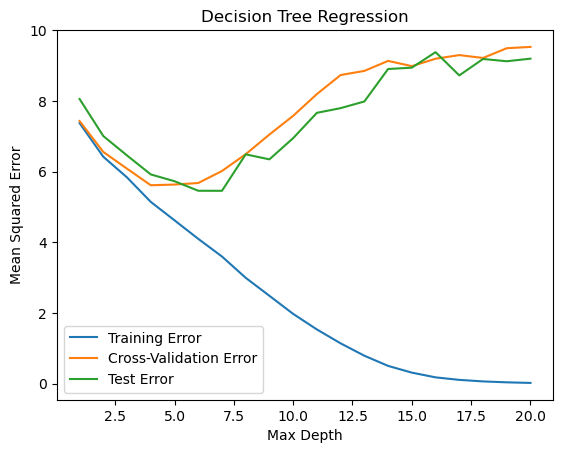

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold


# Define a range of max_depth values to test
max_depths = range(1, 21)

# Initialize lists to store the error values
train_errors = []
cv_errors = []
test_errors = []

# Loop through each max_depth value and fit a decision tree regression model
for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Compute the training error using the mean squared error (MSE)
    dt.fit(train_X, train_y)
    y_train_pred = dt.predict(train_X)
    train_error = np.mean((train_y - y_train_pred)**2)
    train_errors.append(train_error)
    
    # Compute the cross-validation error using 3-fold cross-validation
    cv_error = -1 * np.mean(cross_val_score(dt, train_X, train_y, cv=3, scoring='neg_mean_squared_error'))
    cv_errors.append(cv_error)
    
    # Compute the test error
    y_test_pred = dt.predict(test_X)
    test_error = np.mean((test_y - y_test_pred)**2)
    test_errors.append(test_error)
    
# Plot the training, cross-validation, and test errors as a function of max depth
plt.plot(max_depths, train_errors, label='Training Error')
plt.plot(max_depths, cv_errors, label='Cross-Validation Error')
plt.plot(max_depths, test_errors, label='Test Error')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

We can observe from the plot that as max_depth rises, the training error falls monotonically. This is to be expected as the model gets more sophisticated and better fits the training set of data. The cross-validation error, however, reveals a distinct pattern. As max_depth rises, the error initially declines, but after a certain point, it begins to rise once more. Overfitting is indicated by the model being overly complex and beginning to fit the data noise instead of the underlying pattern. Last but not least, the cross-validation error and test error exhibit the same tendency.

We want to balance the trade-off between bias and variance in order to get the best value for max_depth. High bias (underfitting) results from low max_depth, whereas high variance (overfitting) results from high max_depth. We can observe from the plot that at a max_depth of about 4-6, the minimal cross-validation error occurs. Additionally, this is the point at which the test error is reduced. Therefore, for this model, we would select a max_depth of 5.

#### Train a Decision Tree Regression using a 3-fold cross-validation to tune min samples leaf, using max depth as selected in the previous task and letting all other hyperparameters in their default values. Make a plot of the training errors, cross-validation errors and test errors as a function min samples leaf.

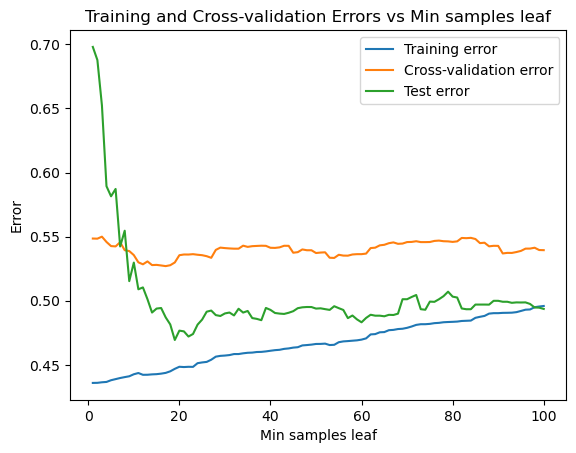

In [57]:
# Define the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42)

# Define the range of values to test for min_samples_leaf
param_grid = {'min_samples_leaf': np.arange(1, 101)}

# Perform a 3-fold cross-validation grid search to find the best value for min_samples_leaf
grid_search = GridSearchCV(dt_reg, param_grid, cv=3, return_train_score=True)
grid_search.fit(train_X, train_y)

# Get the training and cross-validation errors as a function of min_samples_leaf
train_errors = 1 - grid_search.cv_results_['mean_train_score']
val_errors = 1 - grid_search.cv_results_['mean_test_score']

# Get the test errors as a function of min_samples_leaf
test_errors = []
for min_samples_leaf in np.arange(1, 101):
    dt_reg = DecisionTreeRegressor(max_depth=11, min_samples_leaf=min_samples_leaf, random_state=42)
    dt_reg.fit(train_X, train_y)
    test_errors.append(1 - dt_reg.score(test_X, test_y))

# Plot the training and cross-validation errors as a function of min_samples_leaf
plt.plot(np.arange(1, 101), train_errors, label='Training error')
plt.plot(np.arange(1, 101), val_errors, label='Cross-validation error')
plt.plot(np.arange(1, 101), test_errors, label='Test error')
plt.xlabel('Min samples leaf')
plt.ylabel('Error')
plt.title('Training and Cross-validation Errors vs Min samples leaf')
plt.legend()
plt.show()

As the chart shows, the training and cross-validation errors rise as min_samples_leaf is raised, while the test errors decreased. As a result overfitting and enhancing the generalisation performance of the model as the raise the minimal number of samples needed to be at a leaf node. The test errors do not significantly improve after a certain point when min_samples_leaf is increased more.
The min_samples_leaf value in this situation might be around 20, since it seems to provide good performance on the test set while overfitting is not happening.

#### Implement a Random Forest regressor with 500 estimators. Use max depth, and min samples leaf as selected before and manually experiment with other hyperparameters, such as max samples, max features, bootstrap, etc. Train Random Forest regressor on the training set and test it on the test set. 

In [58]:
from sklearn.ensemble import RandomForestRegressor

# create a random forest regressor with 500 estimators
rf = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=20, max_samples=0.5, max_features=0.5, bootstrap=True, random_state=42)

# fit the random forest regressor to the training set
rf.fit(train_X, train_y)

# predict the age of the abalones in the test set
y_pred = rf.predict(test_X)

# round the predicted values to the nearest integer
y_pred_rounded = np.rint(y_pred)

# compute the RMSE for the predictions on the test set
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_y, y_pred_rounded))

print("RMSE: {:.2f}".format(rmse))

RMSE: 2.30


The RMSE is a measure of the average difference between the predicted and actual ages. A lower RMSE indicates better performance of the model. In this case, the RMSE is 2.30

#### Use the feature importances obtained from the training process to trim the feature dimension of the data. In Python code, retain only those features whose importance values are above 5%

In [59]:
# get feature importances
importances = rf.feature_importances_

# get the indices of features with importance > 0.05
indices = np.where(importances > 0.05)[0]

# select the important features
X_train_selected = train_X.iloc[:, indices]
X_test_selected = test_X.iloc[:, indices]

print("Selected features: ", X_train_selected.columns)

Selected features:  Index(['Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


The selected features are 'Diameter','Height', 'Whole weight', 'Shucked weight', 'Viscera weight', and 'Shell weight'. These are the features with importance values above 5%. All other features are removed.

In [60]:
# sum the importance values of selected features
total_importance = np.sum(importances[indices])

print("Total feature importance retained: {:.2f}".format(total_importance))

Total feature importance retained: 0.95


The total feature importance value is 0.95 after dimension reduction step.

#### Repeat the training and prediction processes above on the reduced-dimensional data

In [61]:
# create new dataframes with selected features
X_train_selected = train_X[['Diameter','Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
X_test_selected = test_X[['Diameter','Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
# train Random Forest regressor with 500 estimators
rf_selected = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=30, random_state=42)
rf_selected.fit(X_train_selected, train_y)
# make predictions on the test set
y_pred_selected = rf_selected.predict(X_test_selected)

# round predicted values to nearest integer
y_pred_selected = np.rint(y_pred_selected)

# compute RMSE
rmse_selected = mean_squared_error(test_y, y_pred_selected, squared=False)
print("RMSE with selected features: {:.2f}".format(rmse_selected))

RMSE with selected features: 2.24


The model trained on the complete set of features has an RMSE value of 2.30, while the model trained on the reduced set of features has an RMSE value of 2.24. This shows that the model trained on the selected collection of features performs better than the model trained on the complete set of features.

####  Compare the performance of the two Random Forest regressors

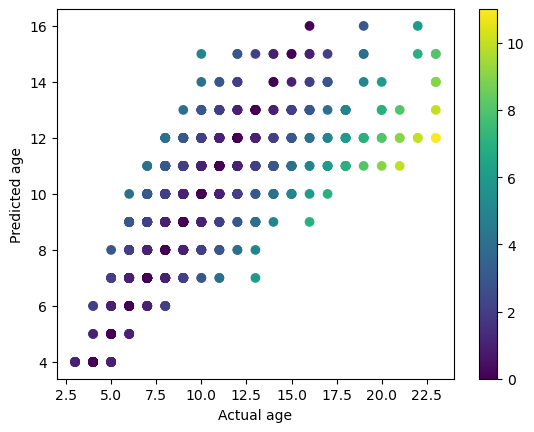

In [62]:
# compute absolute prediction error
abs_error_full = abs(test_y - y_pred_rounded)
abs_error = abs(test_y - y_pred_selected)
# plot scatter plot of predicted age versus actual age
plt.scatter(test_y, y_pred_rounded, c=abs_error_full)
plt.scatter(test_y, y_pred_selected, c=abs_error)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.colorbar()
plt.show()

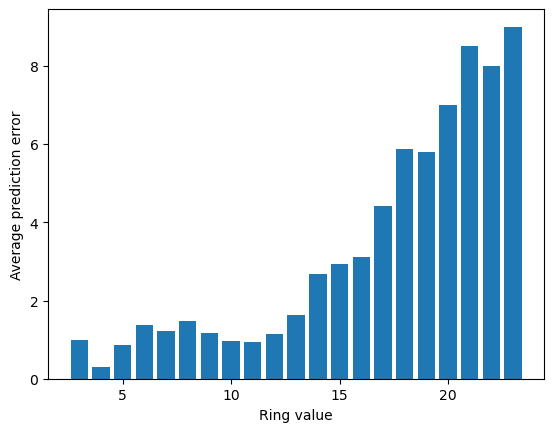

In [63]:
# compute average prediction error for each ring value
ring_values = np.unique(test_y)
avg_error = [np.mean(abs_error[test_y == r]) for r in ring_values]

# plot bar chart of average prediction error by ring value
plt.bar(ring_values, avg_error)
plt.xlabel('Ring value')
plt.ylabel('Average prediction error')
plt.show()

large or small (or both) ring values tend to have large average errors, large prediction error for a ring value is related to insufficient training instances for that ring value.

#### Implement a Bagging regressor with 500 SVM regressors as the base estimators with some reasonable hyperparameter values manually for the SVM regressors. For the Bagging regressor, use the same common hyperparameter values (e.g., max features, max samples, bootstrap, etc) as Random Forest regressor. Train Bagging regressor using the fulldimensional training set and test it using the full-dimensional test set. 

In [64]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

# Define SVM regressor with hyperparameter values
svm_reg = SVR(kernel='rbf', C=1.0, gamma=0.1, epsilon=0.1)

# Define Bagging regressor with 500 SVM regressors as base estimators
bag_reg = BaggingRegressor(base_estimator=svm_reg, n_estimators=500, max_samples=0.5, max_features=0.5, bootstrap=True, random_state=42)

# Train Bagging regressor on full-dimensional training set
bag_reg.fit(train_X, train_y)

# Predict ring values for full-dimensional test set
y_pred = bag_reg.predict(test_X)

# Compute RMSE of predictions for test set
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 2.41


The RMSE of the predictions for the test set is 2.41

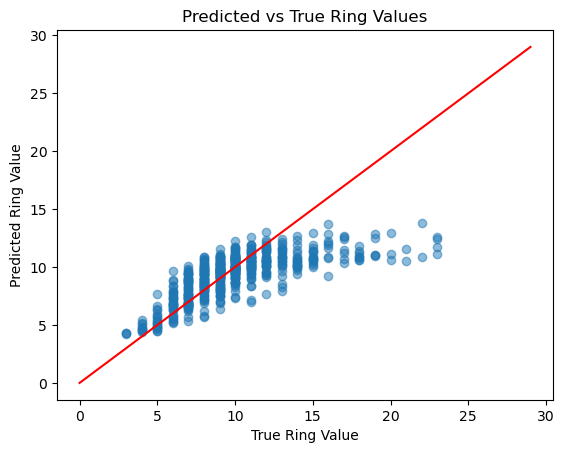

In [65]:
# Plot the predicted values versus the true values
plt.scatter(test_y, y_pred, alpha=0.5)
plt.plot(np.arange(0, 30), np.arange(0, 30), color='red')
plt.xlabel("True Ring Value")
plt.ylabel("Predicted Ring Value")
plt.title("Predicted vs True Ring Values")
plt.show()

In the context of this dataset, a lower RMSE (Root Mean Squared Error) indicates better performance of the model in predicting the age of abalone. The RMSE of the first Random Forest regressor was 2.24, while the RMSE of the Bagging regressor with 500 SVM regressors was 2.41. So, the Random Forest regressor performed is better than the Bagging regressor for this specific dataset.